In [1]:
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

## appendicitis
7 medical measures taken over 106 patients on which the class label represents if the patient has appendicitis (class label 1) or not (class label 0).

In [2]:
with open('datasets/appendicitis.dat', "r") as file:
    lines = file.readlines()

data_start_ind = lines.index("@data\n") + 1
app_data = lines[data_start_ind:]
app_data = pd.read_csv(StringIO("".join(app_data)), header=None)

app_data.columns = ["At1", "At2", "At3", "At4", "At5", "At6", "At7", "Class"]

app_X = app_data.iloc[:, :-1]
app_y = app_data.iloc[:, -1]

print("num observations: ", app_y.count())
print("target distribution: ", app_y.value_counts())


app_X.describe()


num observations:  106
target distribution:  Class
0    85
1    21
Name: count, dtype: int64


At1         At2         At3         At4         At5         At6  \
count  106.000000  106.000000  106.000000  106.000000  106.000000  106.000000   
mean     0.398491    0.682104    0.415151    0.208745    0.169151    0.676349   
std      0.191452    0.207134    0.205799    0.199650    0.177329    0.218909   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.244750    0.589000    0.277000    0.056000    0.049250    0.576000   
50%      0.413000    0.750000    0.442500    0.146000    0.113000    0.744000   
75%      0.505750    0.821000    0.545500    0.302500    0.226750    0.831250   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              At7  
count  106.000000  
mean     0.375396  
std      0.198132  
min      0.000000  
25%      0.238000  
50%      0.397500  
75%      0.486750  
max      1.000000

In [3]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='RSS')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

'from scorecard import Scorecard\nimport time\n\nstart_time = time.time()\nscorecard = Scorecard()\napp_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, \n                thresholds_method=\'CAIM\',\n                encoding_method=\'1_OUT_OF_K\', \n                model_method=\'RSS\')\nscorecard.cross_val_score()\nend_time = time.time()\nprint(f"Execution time: {end_time - start_time} seconds")'

In [4]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

'from scorecard import Scorecard\nimport time\n\nstart_time = time.time()\nscorecard = Scorecard()\napp_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, \n                thresholds_method=\'CAIM\',\n                encoding_method=\'1_OUT_OF_K\', \n                model_method=\'MM\')\nscorecard.cross_val_score()\nend_time = time.time()\nprint(f"Execution time: {end_time - start_time} seconds")'

In [6]:
categorical_columns = app_X.select_dtypes(include=['object']).columns
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    app_X[col] = app_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {app_X[col].unique()}")

Categorical columns:  Index([], dtype='object')



discretization thresholds
num of features:  7
categorical features:  Index([], dtype='object')
aqui 1
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  7
Feature non categorical  0
# 0  GLOBAL CAIM  41.18488372093023
Feature non categorical  1
# 1  GLOBAL CAIM  39.99669148056245
Feature non categorical  2
# 2  GLOBAL CAIM  41.745054945054946
Feature non categorical  3
# 3  GLOBAL CAIM  35.090659340659336
Feature non categorical  4
# 4  GLOBAL CAIM  37.25892316999395
Feature non categorical  5
# 5  GLOBAL CAIM  38.4981684981685
Feature non categorical  6
# 6  GLOBAL CAIM  41.83013879709187

thresholds  {'At1': [0.0, 0.213, 2.0], 'At2': [0.0, 0.411, 2.0], 'At3': [0.0, 0.153, 2.0], 'At4': [0.0, 0.056, 2.0], 'At5': [0.0, 0.029, 2.0], 'At6': [0.0, 0.421, 2.0], 'At7': [0.0, 0.145, 2.0]}
num of bins: 
  At1: 4
  At2: 4
  At3: 4
  At4: 4
  At5: 4
  At6: 4
  At7: 4

encoding
X_disc shape:  (106, 21)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin2', 'featAt1-bin3', 'featAt2-

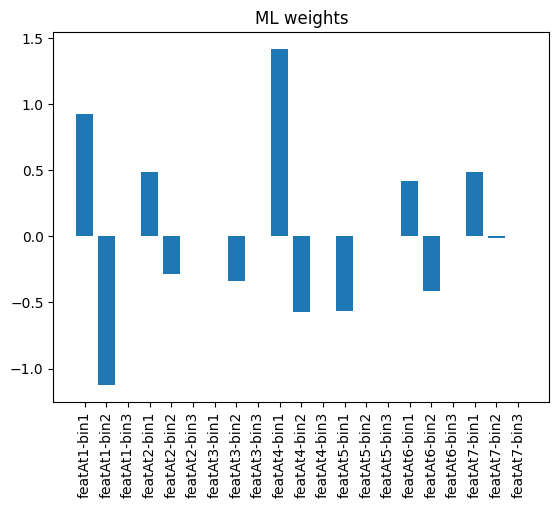

num of zero weights:  9
num of non-zero weights:  12
         Feature    Weight
0   featAt1-bin1  0.928331
1   featAt1-bin2 -1.124187
3   featAt2-bin1  0.489138
4   featAt2-bin2 -0.282572
7   featAt3-bin2 -0.339501
9   featAt4-bin1  1.417159
10  featAt4-bin2 -0.570848
12  featAt5-bin1 -0.567630
15  featAt6-bin1  0.416744
16  featAt6-bin2 -0.414412
18  featAt7-bin1  0.484253
19  featAt7-bin2 -0.008966


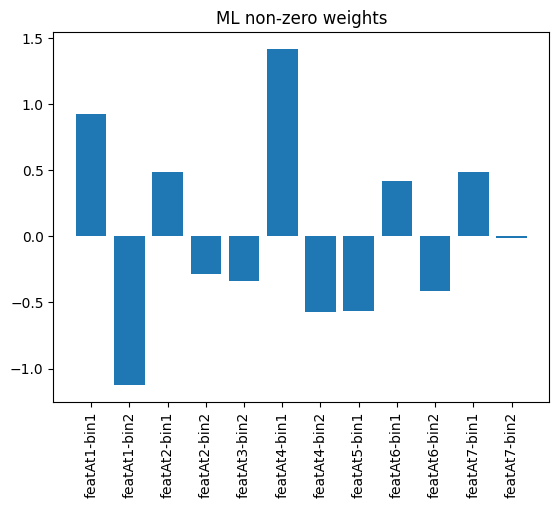

MSEs:  [0.18181818181818182, 0.09090909090909091, 0.0, 0.2727272727272727, 0.09090909090909091, 0.09090909090909091, 0.0, 0.2, 0.3, 0.2]
accuracies:  [0.8181818181818182, 0.9090909090909091, 1.0, 0.7272727272727273, 0.9090909090909091, 0.9090909090909091, 1.0, 0.8, 0.7, 0.8]
AUCs:  [0.8333333333333333, 0.9444444444444444, 1.0, 0.5, 0.9444444444444444, 0.5, 1.0, 0.875, 0.625, 0.875]
mean MSE:  0.14272727272727273
mean accuracy:  0.8572727272727272
mean AUC:  0.8097222222222221
Execution time: 0.37413787841796875 seconds


In [7]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 12



discretization thresholds

thresholds  {'At1': [0.0135, 0.0425, 0.06, 0.0665, 0.07999999999999999, 0.0935, 0.1, 0.109, 0.118, 0.131, 0.16449999999999998, 0.189, 0.1955, 0.202, 0.2085, 0.2155, 0.22, 0.2265, 0.23349999999999999, 0.2535, 0.27749999999999997, 0.291, 0.3, 0.311, 0.3245, 0.33999999999999997, 0.3555, 0.362, 0.3665, 0.371, 0.3755, 0.3845, 0.3935, 0.398, 0.40449999999999997, 0.411, 0.4155, 0.42, 0.4245, 0.429, 0.4355, 0.4445, 0.451, 0.4555, 0.46, 0.4645, 0.469, 0.4755, 0.4845, 0.491, 0.4975, 0.5045, 0.509, 0.5135000000000001, 0.518, 0.522, 0.531, 0.547, 0.5645, 0.58, 0.589, 0.602, 0.6174999999999999, 0.6245, 0.6445000000000001, 0.671, 0.682, 0.7175, 0.7575000000000001, 0.771, 0.787, 0.8400000000000001, 0.942], 'At2': [0.0805, 0.16999999999999998, 0.1875, 0.20500000000000002, 0.223, 0.241, 0.259, 0.2945, 0.33899999999999997, 0.366, 0.393, 0.42, 0.4465, 0.473, 0.491, 0.509, 0.536, 0.5625, 0.58, 0.598, 0.616, 0.634, 0.652, 0.67, 0.6965, 0.723, 0.741, 0.759, 0.777, 0.795, 0.8125, 

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ML best parameters:  {'C': 1000.0}
ML best alpha:  0.001
ML weights:
            Feature    Weight
0     featAt1-bin1  0.000000
1     featAt1-bin2  2.549757
2     featAt1-bin3  0.000000
3     featAt1-bin4  0.000000
4     featAt1-bin5  2.299865
..             ...       ...
518  featAt7-bin94  0.000000
519  featAt7-bin95  0.000000
520  featAt7-bin96  0.000000
521  featAt7-bin97  0.000000
522  featAt7-bin98  5.394589

[523 rows x 2 columns]


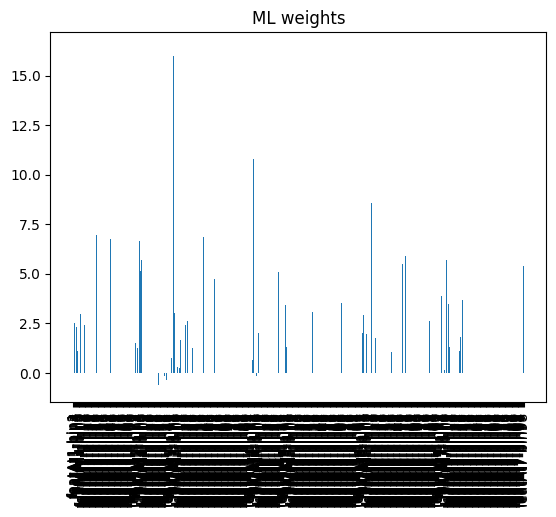

num of zero weights:  453
num of non-zero weights:  70
           Feature     Weight
1     featAt1-bin2   2.549757
4     featAt1-bin5   2.299865
5     featAt1-bin6   1.134268
8     featAt1-bin9   2.976906
10   featAt1-bin11  16.333388
..             ...        ...
449  featAt7-bin25   1.838762
451  featAt7-bin27   3.670741
467  featAt7-bin43   4.242712
468  featAt7-bin44   4.808814
522  featAt7-bin98   5.394589

[70 rows x 2 columns]


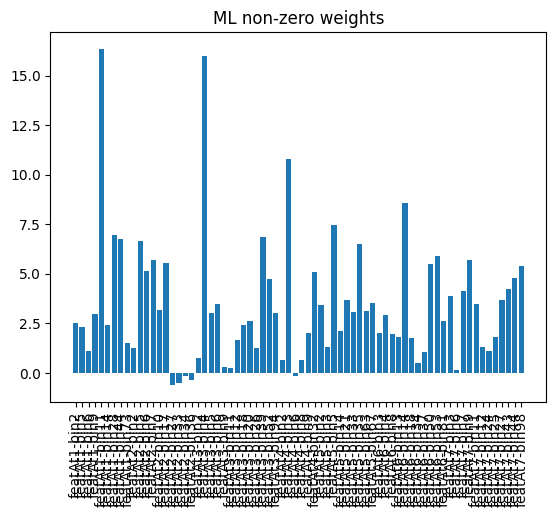

MSEs:  [0.18181818181818182, 0.09090909090909091, 0.0, 0.18181818181818182, 0.09090909090909091, 0.09090909090909091, 0.1, 0.1, 0.2, 0.2]
accuracies:  [0.8181818181818182, 0.9090909090909091, 1.0, 0.8181818181818182, 0.9090909090909091, 0.9090909090909091, 0.9, 0.9, 0.8, 0.8]
AUCs:  [0.7916666666666667, 0.9444444444444444, 1.0, 0.5555555555555556, 0.9444444444444444, 0.5, 0.9375, 0.875, 0.75, 0.8125]
mean MSE:  0.12363636363636363
mean accuracy:  0.8763636363636363
mean AUC:  0.8111111111111111
Execution time: 1.325308084487915 seconds


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_1ook_ml_model, app_infbins_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=13)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
num of features:  7
categorical features:  Index([], dtype='object')
aqui 1
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  7
Feature non categorical  0
# 0  GLOBAL CAIM  41.18488372093023
Feature non categorical  1
# 1  GLOBAL CAIM  39.99669148056245
Feature non categorical  2
# 2  GLOBAL CAIM  41.745054945054946
Feature non categorical  3
# 3  GLOBAL CAIM  35.090659340659336
Feature non categorical  4
# 4  GLOBAL CAIM  37.25892316999395
Feature non categorical  5
# 5  GLOBAL CAIM  38.4981684981685
Feature non categorical  6
# 6  GLOBAL CAIM  41.83013879709187

thresholds  {'At1': [0.0, 0.213, 2.0], 'At2': [0.0, 0.411, 2.0], 'At3': [0.0, 0.153, 2.0], 'At4': [0.0, 0.056, 2.0], 'At5': [0.0, 0.029, 2.0], 'At6': [0.0, 0.421, 2.0], 'At7': [0.0, 0.145, 2.0]}
num of bins: 
  At1: 4
  At2: 4
  At3: 4
  At4: 4
  At5: 4
  At6: 4
  At7: 4

encoding

model
ML best parameters:  {'C': 10.0}
ML best alpha:  0.1
ML weights:
          Feature    Weight
0   fe

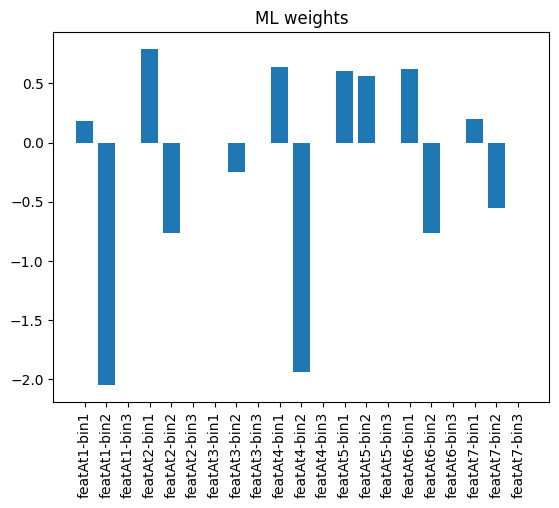

num of zero weights:  7
num of non-zero weights:  14
         Feature    Weight
0   featAt1-bin1  0.182025
1   featAt1-bin2 -2.047812
3   featAt2-bin1  0.790689
4   featAt2-bin2 -0.762227
6   featAt3-bin1  0.000099
7   featAt3-bin2 -0.246390
9   featAt4-bin1  0.634369
10  featAt4-bin2 -1.938110
12  featAt5-bin1  0.608193
13  featAt5-bin2  0.565427
15  featAt6-bin1  0.618062
16  featAt6-bin2 -0.763798
18  featAt7-bin1  0.195649
19  featAt7-bin2 -0.556783


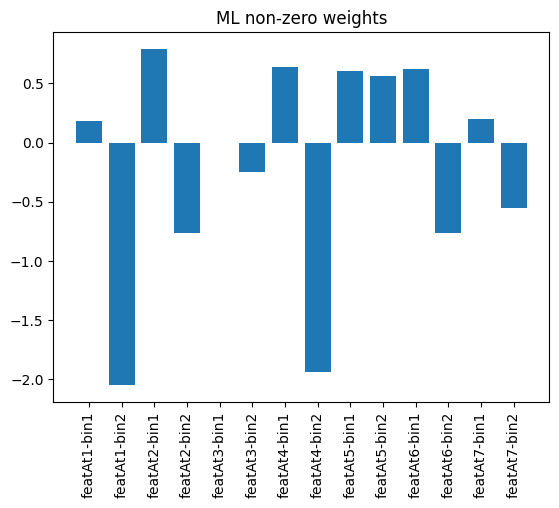

MSEs:  [0.18181818181818182, 0.09090909090909091, 0.0, 0.2727272727272727, 0.09090909090909091, 0.09090909090909091, 0.0, 0.2, 0.3, 0.2]
accuracies:  [0.8181818181818182, 0.9090909090909091, 1.0, 0.7272727272727273, 0.9090909090909091, 0.9090909090909091, 1.0, 0.8, 0.7, 0.8]
AUCs:  [0.8333333333333333, 0.9444444444444444, 1.0, 0.5, 0.9444444444444444, 0.5, 1.0, 0.875, 0.625, 0.875]
mean MSE:  0.14272727272727273
mean accuracy:  0.8572727272727272
mean AUC:  0.8097222222222221
Execution time: 0.26787805557250977 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_caim_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 14



discretization thresholds

thresholds  {'At1': [0.0135, 0.0425, 0.06, 0.0665, 0.07999999999999999, 0.0935, 0.1, 0.109, 0.118, 0.131, 0.16449999999999998, 0.189, 0.1955, 0.202, 0.2085, 0.2155, 0.22, 0.2265, 0.23349999999999999, 0.2535, 0.27749999999999997, 0.291, 0.3, 0.311, 0.3245, 0.33999999999999997, 0.3555, 0.362, 0.3665, 0.371, 0.3755, 0.3845, 0.3935, 0.398, 0.40449999999999997, 0.411, 0.4155, 0.42, 0.4245, 0.429, 0.4355, 0.4445, 0.451, 0.4555, 0.46, 0.4645, 0.469, 0.4755, 0.4845, 0.491, 0.4975, 0.5045, 0.509, 0.5135000000000001, 0.518, 0.522, 0.531, 0.547, 0.5645, 0.58, 0.589, 0.602, 0.6174999999999999, 0.6245, 0.6445000000000001, 0.671, 0.682, 0.7175, 0.7575000000000001, 0.771, 0.787, 0.8400000000000001, 0.942], 'At2': [0.0805, 0.16999999999999998, 0.1875, 0.20500000000000002, 0.223, 0.241, 0.259, 0.2945, 0.33899999999999997, 0.366, 0.393, 0.42, 0.4465, 0.473, 0.491, 0.509, 0.536, 0.5625, 0.58, 0.598, 0.616, 0.634, 0.652, 0.67, 0.6965, 0.723, 0.741, 0.759, 0.777, 0.795, 0.8125, 

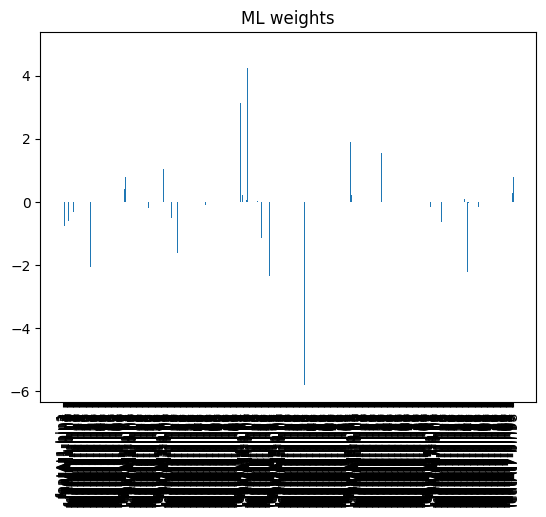

num of zero weights:  479
num of non-zero weights:  44
           Feature    Weight
2     featAt1-bin3 -0.756046
6     featAt1-bin7 -0.604193
12   featAt1-bin13 -0.306673
15   featAt1-bin16 -3.341530
16   featAt1-bin17 -0.933315
31   featAt1-bin32 -1.970372
32   featAt1-bin33 -2.060436
71   featAt1-bin72  0.405818
72   featAt1-bin73  0.805117
73    featAt2-bin1  2.063883
95   featAt2-bin23  0.365231
99   featAt2-bin27 -0.189693
103  featAt2-bin31 -4.665004
116   featAt3-bin4  1.034461
126  featAt3-bin14 -0.494598
133  featAt3-bin21 -1.604935
165  featAt3-bin53 -0.089828
166  featAt3-bin54 -0.012044
205  featAt3-bin93  1.796661
206  featAt3-bin94  3.144526
208   featAt4-bin2  0.208076
213   featAt4-bin7  0.065536
214   featAt4-bin8  4.256161
225  featAt4-bin19  0.022363
230  featAt4-bin24 -1.130264
239  featAt4-bin33 -2.336669
240  featAt4-bin34 -1.220348
241  featAt4-bin35 -1.565217
277  featAt5-bin33  0.264342
280  featAt5-bin36 -5.806237
307  featAt5-bin63  0.115378
333   featAt6-bin

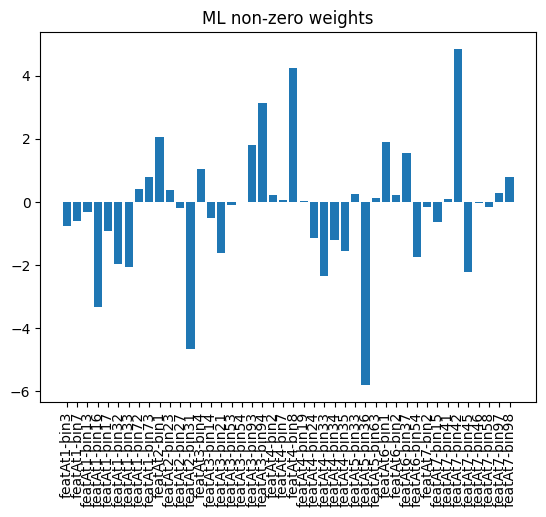

MSEs:  [0.18181818181818182, 0.09090909090909091, 0.0, 0.2727272727272727, 0.09090909090909091, 0.09090909090909091, 0.0, 0.2, 0.3, 0.2]
accuracies:  [0.8181818181818182, 0.9090909090909091, 1.0, 0.7272727272727273, 0.9090909090909091, 0.9090909090909091, 1.0, 0.8, 0.7, 0.8]
AUCs:  [0.8333333333333333, 0.9444444444444444, 1.0, 0.5, 0.9444444444444444, 0.5, 1.0, 0.875, 0.625, 0.875]
mean MSE:  0.14272727272727273
mean accuracy:  0.8572727272727272
mean AUC:  0.8097222222222221
Execution time: 1.2800798416137695 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## mammographic masses
discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.

https://archive.ics.uci.edu/dataset/161/mammographic+mass

In [11]:
# fetch dataset 
mammo_data = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
mammo_X = mammo_data.data.features 
mammo_y = mammo_data.data.targets 

print("num observations: ", mammo_y.count())

# drop rows with nulls
mammo_combined = pd.concat([mammo_X, mammo_y], axis=1)
print("num rows with nulls: ", mammo_combined.isnull().sum().sum())
mammo_combined = mammo_combined.dropna()
mammo_combined = mammo_combined.reset_index(drop=True)
mammo_X = mammo_combined.iloc[:, :-1]
mammo_y = mammo_combined.iloc[:, -1]


# metadata 
# print(mammo_data.metadata) 
  
# variable information 
# print(mammo_data.variables) 

print("num observations: ", mammo_y.count())
print("target distribution: ", mammo_y.value_counts())

mammo_X.describe()

num observations:  Severity    961
dtype: int64
num rows with nulls:  162
num observations:  830
target distribution:  Severity
0    427
1    403
Name: count, dtype: int64


BI-RADS         Age       Shape      Margin     Density
count  830.000000  830.000000  830.000000  830.000000  830.000000
mean     4.393976   55.781928    2.781928    2.813253    2.915663
std      1.888371   14.671782    1.242361    1.567175    0.350936
min      0.000000   18.000000    1.000000    1.000000    1.000000
25%      4.000000   46.000000    2.000000    1.000000    3.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000

In [ ]:
categorical_columns = mammo_X.select_dtypes(include=['object']).columns
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mammo_X[col] = mammo_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mammo_X[col].unique()}")


discretization thresholds
num of features:  5
categorical features:  Index([], dtype='object')
aqui 1
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  5
Feature non categorical  0
# 0  GLOBAL CAIM  285.6742136527413
Feature non categorical  1
# 1  GLOBAL CAIM  200.56837074465608
Feature non categorical  2
# 2  GLOBAL CAIM  253.01568742655698
Feature non categorical  3
# 3  GLOBAL CAIM  248.36477272046983
Feature non categorical  4
# 4  GLOBAL CAIM  110.57423563701806

thresholds  {'BI-RADS': [0.0, 4.0, 56.0], 'Age': [18.0, 57.0, 97.0], 'Shape': [1.0, 2.0, 5.0], 'Margin': [1.0, 2.0, 6.0], 'Density': [1.0, 2.0, 5.0]}
num of bins: 
  BI-RADS: 4
  Age: 4
  Shape: 4
  Margin: 4
  Density: 4

encoding
X_disc shape:  (830, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMarg

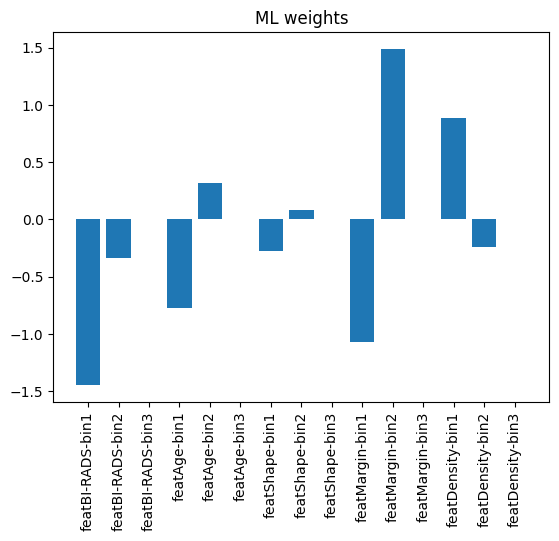

num of zero weights:  5
num of non-zero weights:  10
             Feature    Weight
0   featBI-RADS-bin1 -1.446147
1   featBI-RADS-bin2 -0.338219
3       featAge-bin1 -0.775781
4       featAge-bin2  0.318167
6     featShape-bin1 -0.279308
7     featShape-bin2  0.084951
9    featMargin-bin1 -1.071857
10   featMargin-bin2  1.490093
12  featDensity-bin1  0.889998
13  featDensity-bin2 -0.239377


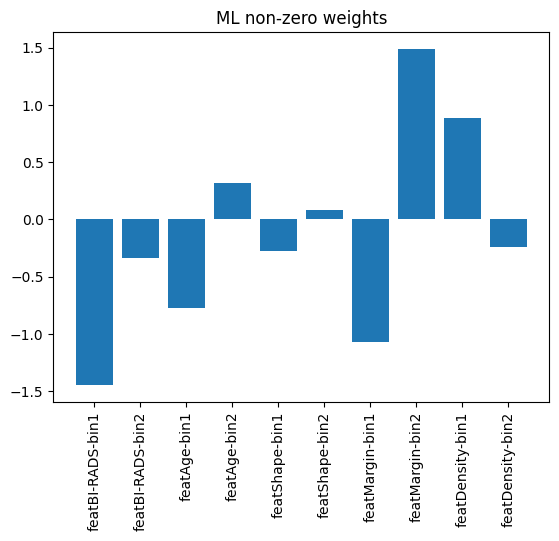

MSEs:  [0.21686746987951808, 0.14457831325301204, 0.13253012048192772, 0.1927710843373494, 0.12048192771084337, 0.21686746987951808, 0.1566265060240964, 0.24096385542168675, 0.10843373493975904, 0.25301204819277107]
accuracies:  [0.7831325301204819, 0.8554216867469879, 0.8674698795180723, 0.8072289156626506, 0.8795180722891566, 0.7831325301204819, 0.8433734939759037, 0.7590361445783133, 0.891566265060241, 0.7469879518072289]
AUCs:  [0.7976190476190477, 0.9216027874564461, 0.9465737514518002, 0.9290697674418604, 0.9340116279069769, 0.8531976744186046, 0.9311046511627906, 0.8953488372093023, 0.936046511627907, 0.8508720930232558]
mean MSE:  0.1783132530120482
mean accuracy:  0.8216867469879519
mean AUC:  0.8995446749317992
Execution time: 0.5494470596313477 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [13]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 10



discretization thresholds

thresholds  {'BI-RADS': [1.0, 2.5, 3.5, 4.5, 5.5, 30.5], 'Age': [18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 82.0, 83.5, 84.5, 85.5, 86.5, 87.5, 90.5, 94.5], 'Shape': [1.5, 2.5, 3.5], 'Margin': [1.5, 2.5, 3.5, 4.5], 'Density': [1.5, 2.5, 3.5]}
num of bins: 
  BI-RADS: 7
  Age: 72
  Shape: 4
  Margin: 5
  Density: 4

encoding
X_disc shape:  (830, 87)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-

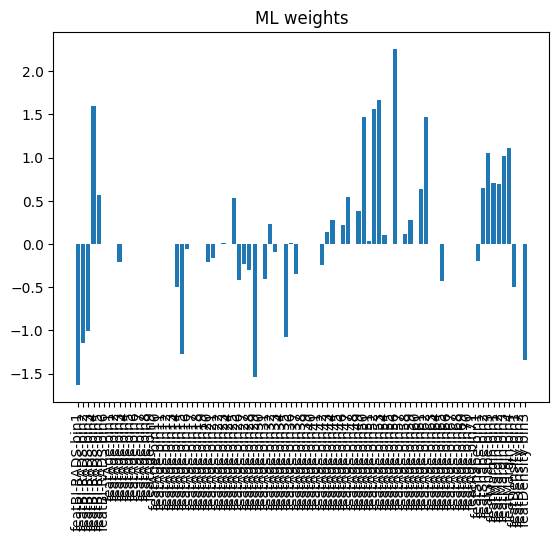

num of zero weights:  38
num of non-zero weights:  49
             Feature    Weight
0   featBI-RADS-bin1 -1.630844
1   featBI-RADS-bin2 -1.147654
2   featBI-RADS-bin3 -1.003452
3   featBI-RADS-bin4  1.597009
4   featBI-RADS-bin5  0.562866
8       featAge-bin3 -0.203729
19     featAge-bin14 -0.500820
20     featAge-bin15 -1.276736
21     featAge-bin16 -0.061331
25     featAge-bin20 -0.204198
26     featAge-bin21 -0.161701
28     featAge-bin23  0.008296
30     featAge-bin25  0.538282
31     featAge-bin26 -0.411887
32     featAge-bin27 -0.231540
33     featAge-bin28 -0.303972
34     featAge-bin29 -1.535050
36     featAge-bin31 -0.405413
37     featAge-bin32  0.235950
38     featAge-bin33 -0.090785
40     featAge-bin35 -1.075499
41     featAge-bin36  0.017582
42     featAge-bin37 -0.345614
47     featAge-bin42 -0.241981
48     featAge-bin43  0.143346
49     featAge-bin44  0.281837
51     featAge-bin46  0.218474
52     featAge-bin47  0.543583
54     featAge-bin49  0.382220
55     featAge-b

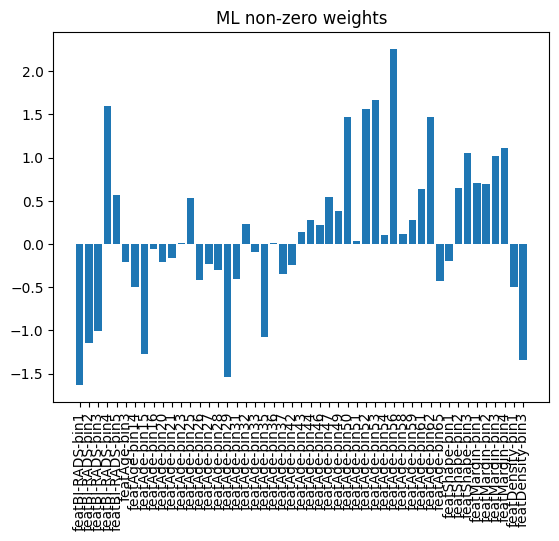

MSEs:  [0.21686746987951808, 0.14457831325301204, 0.13253012048192772, 0.18072289156626506, 0.12048192771084337, 0.21686746987951808, 0.14457831325301204, 0.24096385542168675, 0.10843373493975904, 0.2289156626506024]
accuracies:  [0.7831325301204819, 0.8554216867469879, 0.8674698795180723, 0.8192771084337349, 0.8795180722891566, 0.7831325301204819, 0.8554216867469879, 0.7590361445783133, 0.891566265060241, 0.7710843373493976]
AUCs:  [0.792973286875726, 0.921602787456446, 0.9494773519163763, 0.9267441860465117, 0.9340116279069767, 0.8537790697674419, 0.9299418604651162, 0.8941860465116278, 0.9418604651162791, 0.8502906976744187]
mean MSE:  0.17349397590361446
mean accuracy:  0.8265060240963857
mean AUC:  0.899486737973692
Execution time: 0.8606908321380615 seconds


In [ ]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
mammo_infbins_1ook_ml_model, mammo_infbins_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
num of features:  5
categorical features:  Index([], dtype='object')
aqui 1
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  5
Feature non categorical  0
# 0  GLOBAL CAIM  285.6742136527413
Feature non categorical  1
# 1  GLOBAL CAIM  200.56837074465608
Feature non categorical  2
# 2  GLOBAL CAIM  253.01568742655698
Feature non categorical  3
# 3  GLOBAL CAIM  248.36477272046983
Feature non categorical  4
# 4  GLOBAL CAIM  110.57423563701806

thresholds  {'BI-RADS': [0.0, 4.0, 56.0], 'Age': [18.0, 57.0, 97.0], 'Shape': [1.0, 2.0, 5.0], 'Margin': [1.0, 2.0, 6.0], 'Density': [1.0, 2.0, 5.0]}
num of bins: 
  BI-RADS: 4
  Age: 4
  Shape: 4
  Margin: 4
  Density: 4

encoding

model
ML best parameters:  {'C': 1000.0}
ML best alpha:  0.001
ML weights:
              Feature    Weight
0   featBI-RADS-bin1 -0.443231
1   featBI-RADS-bin2  1.107191
2   featBI-RADS-bin3  0.000000
3       featAge-bin1 -0.494535
4       featAge-bin2  1.093913
5       featAge-

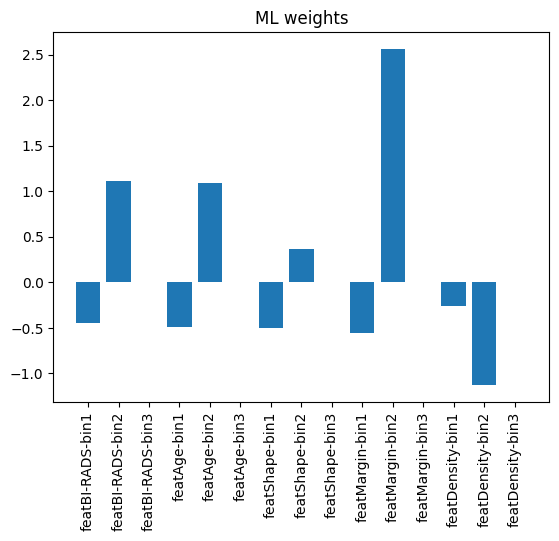

num of zero weights:  5
num of non-zero weights:  10
             Feature    Weight
0   featBI-RADS-bin1 -0.443231
1   featBI-RADS-bin2  1.107191
3       featAge-bin1 -0.494535
4       featAge-bin2  1.093913
6     featShape-bin1 -0.498210
7     featShape-bin2  0.363749
9    featMargin-bin1 -0.551758
10   featMargin-bin2  2.562030
12  featDensity-bin1 -0.261236
13  featDensity-bin2 -1.126819


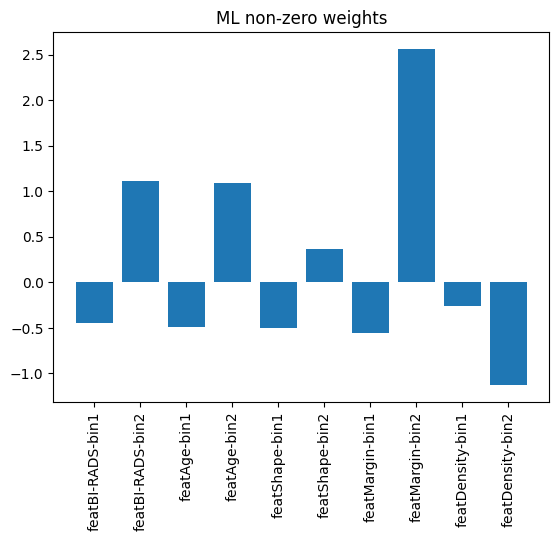

MSEs:  [0.21686746987951808, 0.14457831325301204, 0.13253012048192772, 0.1927710843373494, 0.12048192771084337, 0.21686746987951808, 0.1566265060240964, 0.24096385542168675, 0.10843373493975904, 0.25301204819277107]
accuracies:  [0.7831325301204819, 0.8554216867469879, 0.8674698795180723, 0.8072289156626506, 0.8795180722891566, 0.7831325301204819, 0.8433734939759037, 0.7590361445783133, 0.891566265060241, 0.7469879518072289]
AUCs:  [0.7976190476190477, 0.9216027874564461, 0.9465737514518002, 0.9290697674418604, 0.9340116279069769, 0.8531976744186046, 0.9311046511627906, 0.8953488372093023, 0.936046511627907, 0.8508720930232558]
mean MSE:  0.1783132530120482
mean accuracy:  0.8216867469879519
mean AUC:  0.8995446749317992
Execution time: 0.6384460926055908 seconds


In [ ]:

start_time = time.time()
scorecard = Scorecard()
mammo_caim_diff_ml_model, mammo_caim_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [16]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 10



discretization thresholds

thresholds  {'BI-RADS': [1.0, 2.5, 3.5, 4.5, 5.5, 30.5], 'Age': [18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 82.0, 83.5, 84.5, 85.5, 86.5, 87.5, 90.5, 94.5], 'Shape': [1.5, 2.5, 3.5], 'Margin': [1.5, 2.5, 3.5, 4.5], 'Density': [1.5, 2.5, 3.5]}
num of bins: 
  BI-RADS: 7
  Age: 72
  Shape: 4
  Margin: 5
  Density: 4

encoding

model
ML best parameters:  {'C': 1.1111111111111112}
ML best alpha:  0.8999999999999999
ML weights:
              Feature    Weight
0   featBI-RADS-bin1 -0.259265
1   featBI-RADS-bin2  0.000000
2   featBI-RADS-bin3  0.000000
3   featBI-RADS-bin4  2.400903
4   featBI-RADS-bin5  0.000000
..               ...   

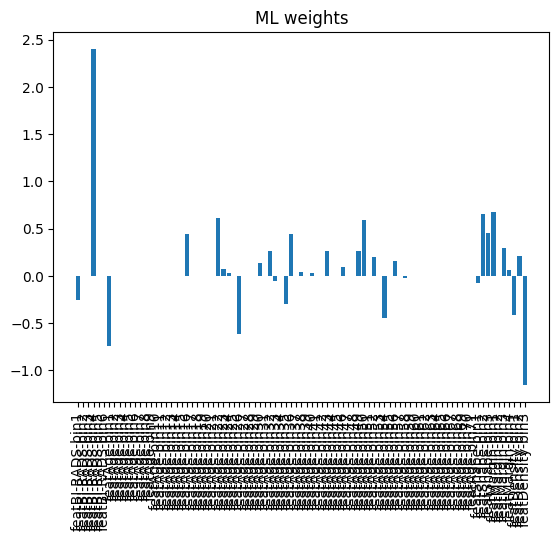

num of zero weights:  55
num of non-zero weights:  32
             Feature    Weight
0   featBI-RADS-bin1 -0.259265
3   featBI-RADS-bin4  2.400903
6       featAge-bin1 -0.738044
21     featAge-bin16  0.440527
27     featAge-bin22  0.613102
28     featAge-bin23  0.076742
29     featAge-bin24  0.034847
31     featAge-bin26 -0.619921
35     featAge-bin30  0.140620
37     featAge-bin32  0.259940
38     featAge-bin33 -0.053702
40     featAge-bin35 -0.301250
41     featAge-bin36  0.448078
43     featAge-bin38  0.045210
45     featAge-bin40  0.033116
48     featAge-bin43  0.264786
51     featAge-bin46  0.094113
54     featAge-bin49  0.264761
55     featAge-bin50  0.591416
57     featAge-bin52  0.199935
59     featAge-bin54 -0.442663
61     featAge-bin56  0.162830
63     featAge-bin58 -0.026149
77    featShape-bin1 -0.079008
78    featShape-bin2  0.651199
79    featShape-bin3  0.455671
80   featMargin-bin1  0.670900
82   featMargin-bin3  0.292199
83   featMargin-bin4  0.058759
84  featDensity-

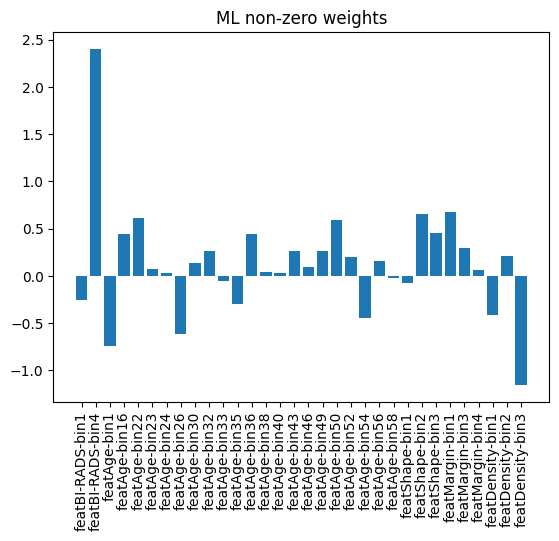

MSEs:  [0.21686746987951808, 0.14457831325301204, 0.13253012048192772, 0.18072289156626506, 0.13253012048192772, 0.21686746987951808, 0.14457831325301204, 0.24096385542168675, 0.10843373493975904, 0.21686746987951808]
accuracies:  [0.7831325301204819, 0.8554216867469879, 0.8674698795180723, 0.8192771084337349, 0.8674698795180723, 0.7831325301204819, 0.8554216867469879, 0.7590361445783133, 0.891566265060241, 0.7831325301204819]
AUCs:  [0.7894889663182346, 0.9210220673635309, 0.9488966318234612, 0.9267441860465117, 0.9334302325581395, 0.8531976744186047, 0.9299418604651162, 0.8924418604651163, 0.9412790697674418, 0.8526162790697674]
mean MSE:  0.17349397590361446
mean accuracy:  0.8265060240963855
mean AUC:  0.8989058828295924
Execution time: 8.36474895477295 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_infbins_diff_ml_model, mammo_infbins_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## aesthetic evaluation (binary version)

In [18]:
import pandas as pd
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

Subjective Evaluation  BRA Value  LBC Value  UNR Value  BCE Value  \
0                  Good   1.149009   0.830915   0.107618   0.938534   
1                  Good   2.368824   1.326447   1.599444   0.272997   
2                  Good   1.409939   0.950935   0.278358   1.229293   
3                  Good   2.059918   0.720926   1.786307   1.065381   
4                  Good   2.452595   0.798596   1.868745   1.070148   

   BCD Value  BAD Value  BOD Value  pBRA Value  pLBC Value  ...  pBAD Value  \
0   1.934477   4.885198  17.296370    0.049401    0.033356  ...    0.029188   
1   0.035378  19.932998  68.761479    0.113919    0.058509  ...    0.117875   
2   2.221074  22.277770  38.323430    0.067231    0.038613  ...    0.120132   
3   1.995007  25.163410  31.631070    0.100705    0.032141  ...    0.156030   
4   1.218189   0.395585  31.426783    0.117249    0.035235  ...    0.002820   

   pBOD Value  cX2L Value  cX2a Value  cX2b Value  cX2Lab Value  cEMDL Value  \
0    0.103340    0.097502    0.009506    0.217169      0.100670     1.503086   
1    0.406627    0.305692    0.159653    0.193317      0.061736     1.248600   
2    0.206658    0.109386    0.024217    0.280625      0.012974     0.545858   
3    0.196133    0.038581    0.032267    0.026153      0.010779     0.334111   
4    0.224062    0.021259    0.027071    0.029206      0.006495     0.165401   

   cEMDa Value  cEMDb Value  cEMDLab Value  
0     0.030362     0.291363       0.210082  
1     0.206529     0.351693       0.105346  
2     0.075520     0.304185       0.049345  
3     0.105626     0.137693       0.031455  
4     0.081549     0.091768       0.030546  

[5 rows x 23 columns]

In [19]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

In [20]:
# create binary target from aesthetic evaluation, by joining good and excellent, and fair and poor
aesthetic_evaluation_binary_y = aesthetic_evaluation_y.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})

# distribution
aesthetic_evaluation_binary_y.value_counts()

Subjective Evaluation
1    903
0    455
Name: count, dtype: int64

In [ ]:
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")



discretization thresholds
num of features:  22
categorical features:  Index([], dtype='object')
aqui 1
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  22
Feature non categorical  0
# 0  GLOBAL CAIM  375.66257083519406
Feature non categorical  1
# 1  GLOBAL CAIM  420.75608164817584
Feature non categorical  2
# 2  GLOBAL CAIM  412.29462484745113
Feature non categorical  3
# 3  GLOBAL CAIM  350.72825854355256
Feature non categorical  4
# 4  GLOBAL CAIM  400.70175438596493
Feature non categorical  5
# 5  GLOBAL CAIM  371.84981422721233
Feature non categorical  6
# 6  GLOBAL CAIM  340.4128006872852
Feature non categorical  7
# 7  GLOBAL CAIM  370.1803096527949
Feature non categorical  8
# 8  GLOBAL CAIM  426.3106086548755
Feature non categorical  9
# 9  GLOBAL CAIM  414.4864713136033
Feature non categorical  10
# 10  GLOBAL CAIM  349.3037889148098
Feature non categorical  11
# 11  GLOBAL CAIM  400.7345237830506
Feature non categorical  12
# 12  GLOBAL CAIM  373.517110719659

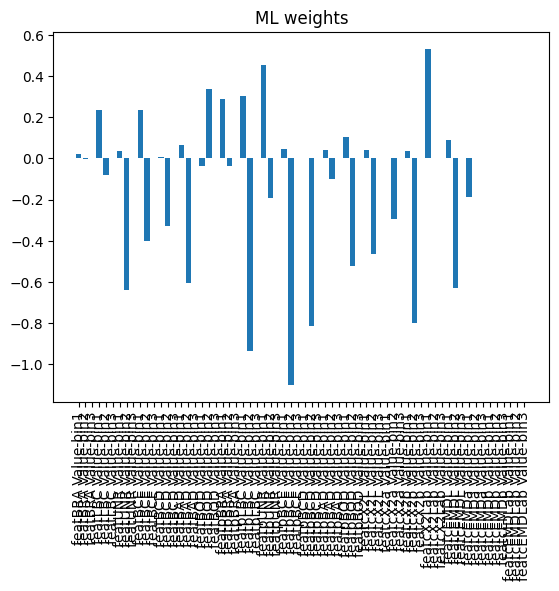

num of zero weights:  29
num of non-zero weights:  37
                  Feature    Weight
0      featBRA Value-bin1  0.019985
1      featBRA Value-bin2 -0.001232
3      featLBC Value-bin1  0.236344
4      featLBC Value-bin2 -0.081101
6      featUNR Value-bin1  0.037468
7      featUNR Value-bin2 -0.638577
9      featBCE Value-bin1  0.233608
10     featBCE Value-bin2 -0.401922
12     featBCD Value-bin1  0.008146
13     featBCD Value-bin2 -0.327862
15     featBAD Value-bin1  0.063966
16     featBAD Value-bin2 -0.605977
18     featBOD Value-bin1 -0.035839
19     featBOD Value-bin2  0.336761
21    featpBRA Value-bin1  0.286418
22    featpBRA Value-bin2 -0.035883
24    featpLBC Value-bin1  0.305219
25    featpLBC Value-bin2 -0.933914
27    featpUNR Value-bin1  0.454971
28    featpUNR Value-bin2 -0.192346
30    featpBCE Value-bin1  0.045676
31    featpBCE Value-bin2 -1.099892
33    featpBCD Value-bin1  0.004454
34    featpBCD Value-bin2 -0.812618
36    featpBAD Value-bin1  0.041778
37    feat

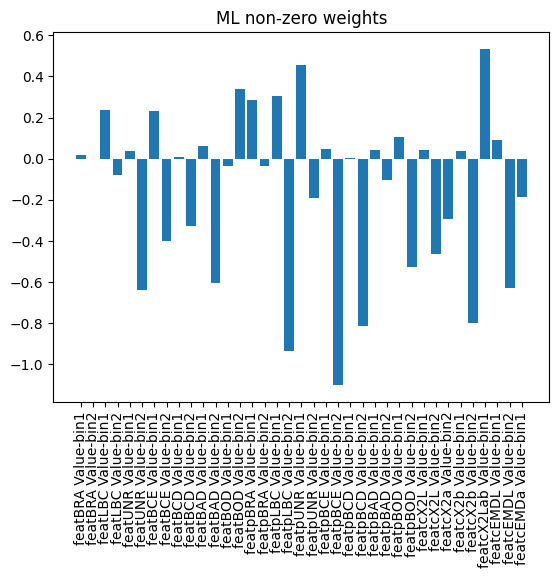

MSEs:  [0.18382352941176472, 0.21323529411764705, 0.20588235294117646, 0.22794117647058823, 0.11029411764705882, 0.19117647058823528, 0.13970588235294118, 0.11764705882352941, 0.17777777777777778, 0.2]
accuracies:  [0.8161764705882353, 0.7867647058823529, 0.7941176470588235, 0.7720588235294118, 0.8897058823529411, 0.8088235294117647, 0.8602941176470589, 0.8823529411764706, 0.8222222222222222, 0.8]
AUCs:  [0.85006105006105, 0.8307692307692307, 0.8744810744810745, 0.8142512077294687, 0.9318840579710145, 0.8893719806763285, 0.8932367149758453, 0.9062801932367149, 0.9012345679012346, 0.82]
mean MSE:  0.1767483660130719
mean accuracy:  0.8232516339869281
mean AUC:  0.8711570077801962
Execution time: 2.5543601512908936 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_1ook_ml_model, aesthetic_binary_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [22]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 37



discretization thresholds

thresholds  {'BRA Value': [0.12172490091794336, 0.1517187794102377, 0.1627276999486896, 0.17174081021731435, 0.18943093498657326, 0.19868631706202833, 0.20154489666341896, 0.20882918670067196, 0.21511673901980122, 0.23356299924095925, 0.25998993666774833, 0.26979525183184316, 0.2772706540547385, 0.284913290130897, 0.29489299511289246, 0.3047813749760474, 0.3064317925618756, 0.3093584705324939, 0.3136842659973549, 0.32186438324311417, 0.32983289494090917, 0.33359830460351236, 0.33569655002749277, 0.3385120196442457, 0.3446575366240152, 0.35401413619332134, 0.36326914384912906, 0.37758534682842426, 0.3879537697075084, 0.3949056631257663, 0.4016605202196266, 0.40327292614681354, 0.4057383237190699, 0.41532184931716165, 0.42436946542605136, 0.43301866189125515, 0.44161193606901394, 0.4444553868713025, 0.44826727689531626, 0.4507029785364637, 0.4527075558787709, 0.46334531565255604, 0.4760830037733772, 0.48283427376436205, 0.491955979289541, 0.49752310090265306, 

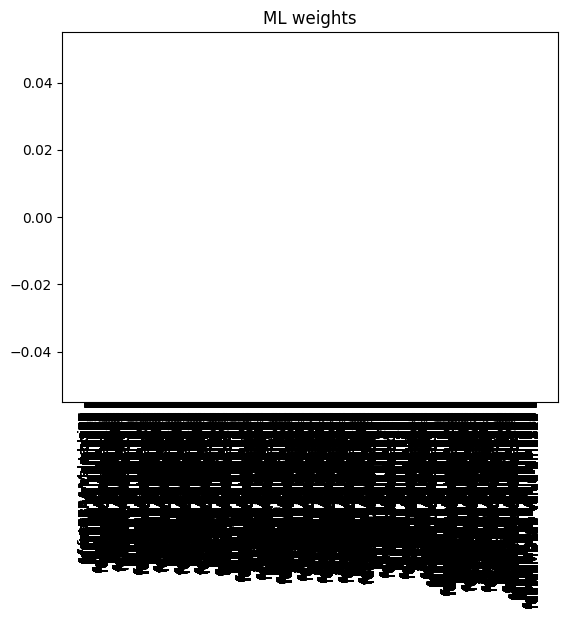

num of zero weights:  29854
num of non-zero weights:  0
Empty DataFrame
Columns: [Feature, Weight]
Index: []


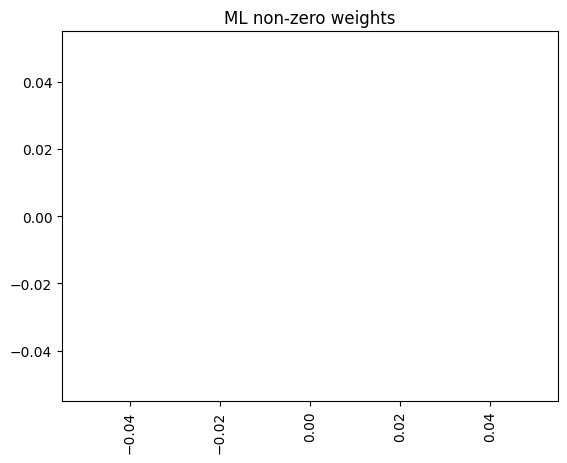

MSEs:  [0.18382352941176472, 0.21323529411764705, 0.20588235294117646, 0.22794117647058823, 0.11029411764705882, 0.19117647058823528, 0.13970588235294118, 0.11764705882352941, 0.17777777777777778, 0.2]
accuracies:  [0.8161764705882353, 0.7867647058823529, 0.7941176470588235, 0.7720588235294118, 0.8897058823529411, 0.8088235294117647, 0.8602941176470589, 0.8823529411764706, 0.8222222222222222, 0.8]
AUCs:  [0.85006105006105, 0.8307692307692307, 0.8744810744810745, 0.8142512077294687, 0.9318840579710145, 0.8893719806763285, 0.8932367149758453, 0.9062801932367149, 0.9012345679012346, 0.82]
mean MSE:  0.1767483660130719
mean accuracy:  0.8232516339869281
mean AUC:  0.8711570077801962
Execution time: 113.05733489990234 seconds


In [ ]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_1ook_ml_model, aesthetic_binary_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
num of features:  22
categorical features:  Index([], dtype='object')
aqui 1
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  22
Feature non categorical  0
# 0  GLOBAL CAIM  375.66257083519406
Feature non categorical  1
# 1  GLOBAL CAIM  420.75608164817584
Feature non categorical  2
# 2  GLOBAL CAIM  412.29462484745113
Feature non categorical  3
# 3  GLOBAL CAIM  350.72825854355256
Feature non categorical  4
# 4  GLOBAL CAIM  400.70175438596493
Feature non categorical  5
# 5  GLOBAL CAIM  371.84981422721233
Feature non categorical  6
# 6  GLOBAL CAIM  340.4128006872852
Feature non categorical  7
# 7  GLOBAL CAIM  370.1803096527949
Feature non categorical  8
# 8  GLOBAL CAIM  426.3106086548755
Feature non categorical  9
# 9  GLOBAL CAIM  414.4864713136033
Feature non categorical  10
# 10  GLOBAL CAIM  349.3037889148098
Feature non categorical  11
# 11  GLOBAL CAIM  400.7345237830506
Feature non categorical  12
# 12  GLOBAL CAIM  373.517110719659

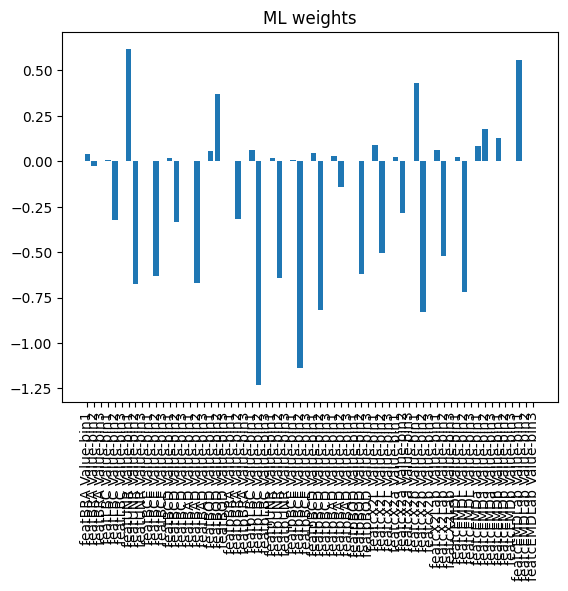

num of zero weights:  24
num of non-zero weights:  42
                   Feature    Weight
0       featBRA Value-bin1  0.038052
1       featBRA Value-bin2 -0.024608
3       featLBC Value-bin1  0.005497
4       featLBC Value-bin2 -0.321559
6       featUNR Value-bin1  0.619194
7       featUNR Value-bin2 -0.675841
9       featBCE Value-bin1  0.000579
10      featBCE Value-bin2 -0.633089
12      featBCD Value-bin1  0.017027
13      featBCD Value-bin2 -0.332017
15      featBAD Value-bin1  0.000054
16      featBAD Value-bin2 -0.668435
18      featBOD Value-bin1  0.058284
19      featBOD Value-bin2  0.371897
21     featpBRA Value-bin1  0.000291
22     featpBRA Value-bin2 -0.316423
24     featpLBC Value-bin1  0.059322
25     featpLBC Value-bin2 -1.229937
27     featpUNR Value-bin1  0.016300
28     featpUNR Value-bin2 -0.644804
30     featpBCE Value-bin1  0.008828
31     featpBCE Value-bin2 -1.139566
33     featpBCD Value-bin1  0.045060
34     featpBCD Value-bin2 -0.818382
36     featpBAD Value

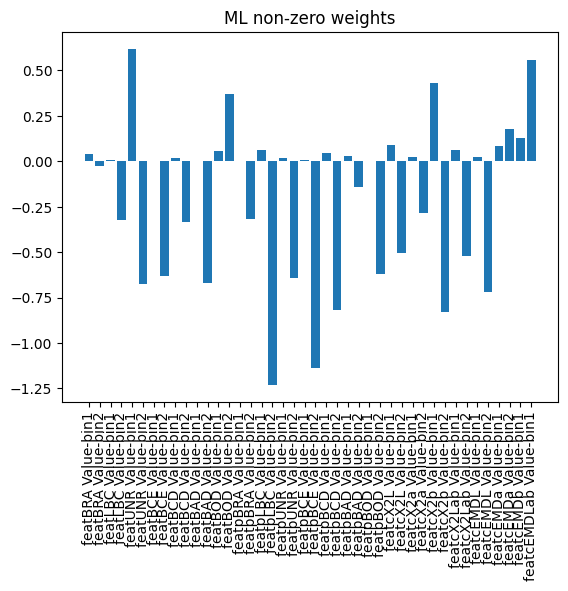

MSEs:  [0.18382352941176472, 0.21323529411764705, 0.20588235294117646, 0.22794117647058823, 0.11029411764705882, 0.19117647058823528, 0.13970588235294118, 0.11764705882352941, 0.17777777777777778, 0.2]
accuracies:  [0.8161764705882353, 0.7867647058823529, 0.7941176470588235, 0.7720588235294118, 0.8897058823529411, 0.8088235294117647, 0.8602941176470589, 0.8823529411764706, 0.8222222222222222, 0.8]
AUCs:  [0.85006105006105, 0.8305250305250306, 0.8744810744810745, 0.8142512077294687, 0.9318840579710145, 0.8893719806763285, 0.8932367149758453, 0.9062801932367149, 0.9012345679012346, 0.82]
mean MSE:  0.1767483660130719
mean accuracy:  0.8232516339869281
mean AUC:  0.8711325877557762
Execution time: 2.153963088989258 seconds


In [ ]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_diff_ml_model, aesthetic_binary_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [25]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 42



discretization thresholds

thresholds  {'BRA Value': [0.12172490091794336, 0.1517187794102377, 0.1627276999486896, 0.17174081021731435, 0.18943093498657326, 0.19868631706202833, 0.20154489666341896, 0.20882918670067196, 0.21511673901980122, 0.23356299924095925, 0.25998993666774833, 0.26979525183184316, 0.2772706540547385, 0.284913290130897, 0.29489299511289246, 0.3047813749760474, 0.3064317925618756, 0.3093584705324939, 0.3136842659973549, 0.32186438324311417, 0.32983289494090917, 0.33359830460351236, 0.33569655002749277, 0.3385120196442457, 0.3446575366240152, 0.35401413619332134, 0.36326914384912906, 0.37758534682842426, 0.3879537697075084, 0.3949056631257663, 0.4016605202196266, 0.40327292614681354, 0.4057383237190699, 0.41532184931716165, 0.42436946542605136, 0.43301866189125515, 0.44161193606901394, 0.4444553868713025, 0.44826727689531626, 0.4507029785364637, 0.4527075558787709, 0.46334531565255604, 0.4760830037733772, 0.48283427376436205, 0.491955979289541, 0.49752310090265306, 

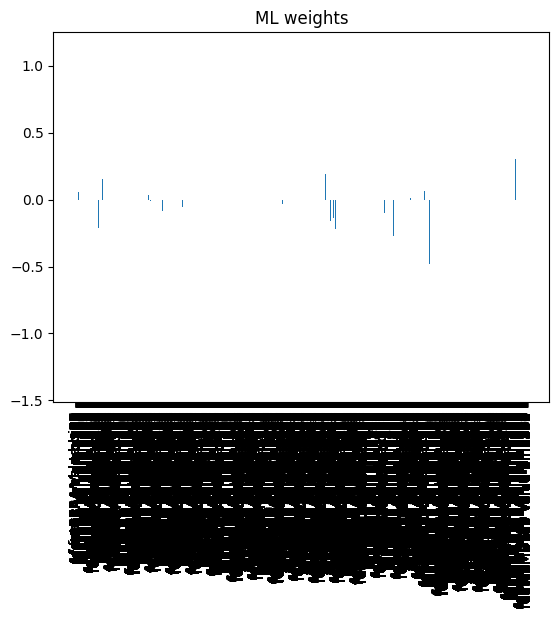

num of zero weights:  28787
num of non-zero weights:  1067
                         Feature    Weight
1             featBRA Value-bin2  0.021987
2             featBRA Value-bin3  0.045278
3             featBRA Value-bin4  0.000180
49           featBRA Value-bin50  0.000420
77           featBRA Value-bin78  0.017514
...                          ...       ...
29413   featcEMDLab Value-bin917 -0.350064
29449   featcEMDLab Value-bin953  0.058099
29524  featcEMDLab Value-bin1028 -0.020247
29725  featcEMDLab Value-bin1229 -0.006162
29726  featcEMDLab Value-bin1230 -0.098392

[1067 rows x 2 columns]


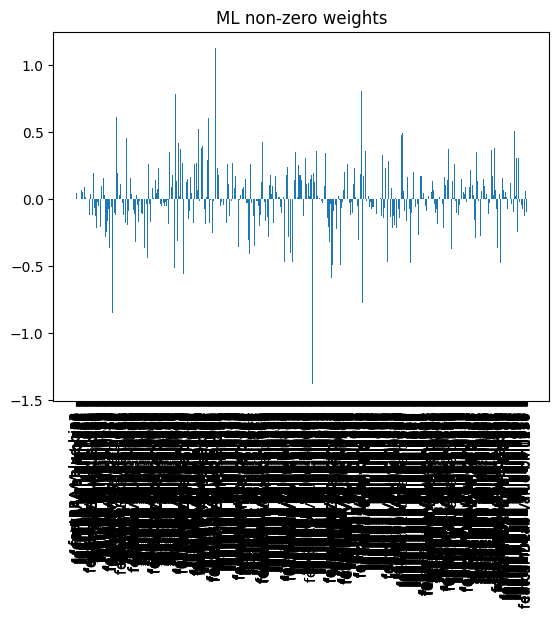

MSEs:  [0.18382352941176472, 0.21323529411764705, 0.19852941176470587, 0.22794117647058823, 0.11764705882352941, 0.19117647058823528, 0.1323529411764706, 0.10294117647058823, 0.17777777777777778, 0.2]
accuracies:  [0.8161764705882353, 0.7867647058823529, 0.8014705882352942, 0.7720588235294118, 0.8823529411764706, 0.8088235294117647, 0.8676470588235294, 0.8970588235294118, 0.8222222222222222, 0.8]
AUCs:  [0.85006105006105, 0.8297924297924297, 0.8766788766788767, 0.8140096618357489, 0.9309178743961353, 0.8910628019323672, 0.8937198067632851, 0.9067632850241546, 0.9019753086419753, 0.82]
mean MSE:  0.17454248366013073
mean accuracy:  0.8254575163398693
mean AUC:  0.8714981095126022
Execution time: 192.01834797859192 seconds


In [ ]:
from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_diff_ml_model, aesthetic_binary_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## adult
predict whether annual income of an individual exceeds $50K/yr based on census data

https://archive.ics.uci.edu/dataset/2/adult

num rows with nulls:  22746
num observations:  30162
num features:  14
target distribution:  income
0    22654
1     7508
Name: count, dtype: int64


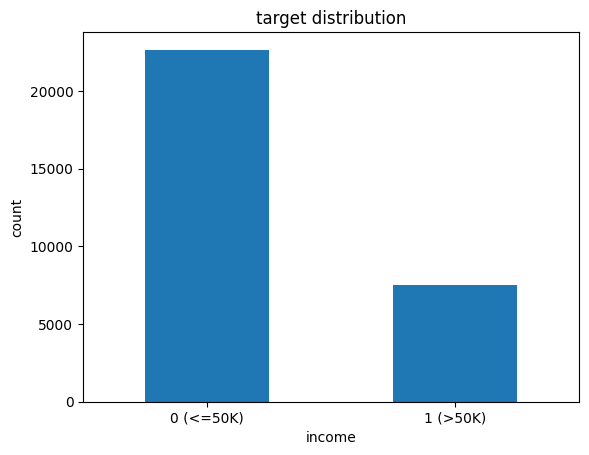

In [10]:
# fetch dataset 
adult_data = fetch_ucirepo(id=2) 
  
# check for nulls

# data (as pandas dataframes) 
adult_X = adult_data.data.features 
adult_y = adult_data.data.targets
adult_y.loc[:,'income'] = adult_y['income'].map({'>50K': 1, '<=50K': 0})


# substitute '?' with NaN
adult_X = adult_X.replace('?', pd.NA)
adult_y = adult_y.replace('?', pd.NA)

# drop rows with nulls
adult_combined = pd.concat([adult_X, adult_y], axis=1)
print("num rows with nulls: ", adult_combined.isnull().sum().sum())
adult_combined = adult_combined.dropna()
adult_combined = adult_combined.reset_index(drop=True)
adult_X = adult_combined.iloc[:, :-1]
adult_y = adult_combined.iloc[:, -1]

# metadata 
# print(adult_data.metadata) 
  
# variable information 
# print(adult_data.variables) 

# make y be int
adult_y = adult_y.astype(int)

print("num observations: ", adult_y.count())
print("num features: ", adult_X.shape[1])
print("target distribution: ", adult_y.value_counts())
adult_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (<=50K)', '1 (>50K)'], rotation=0)
plt.show()


In [11]:
# get type of each column
print("types: ", adult_X.dtypes)

# show categorical columns
print("\nobject columns: ", adult_X.select_dtypes(include=['object']).columns)
categorical_columns = adult_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", adult_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", adult_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

types:  age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

object columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

number of unique values in each categorical column:  workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

values of all categorical columns:  workclass         [State-gov, Self-emp-not-inc, Private, Federal...
education         [Bachelors, HS-grad, 11th, Masters, 9th, Some-...
marital-status    [Never-married, Married-civ-spouse, Divo

In [12]:
# show occupation column
print("\noccupation column: ", adult_X['occupation'].unique())


occupation column:  ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [13]:
categorical_columns = adult_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    adult_X[col] = adult_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {adult_X[col].unique()}")

categorical columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')
Column workclass encoded as: [5 4 2 0 1 3 6]
Column education encoded as: [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Column marital-status encoded as: [4 2 0 3 5 1 6]
Column occupation encoded as: [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Column relationship encoded as: [1 0 5 3 4 2]
Column race encoded as: [4 2 1 0 3]
Column sex encoded as: [1 0]
Column native-country encoded as: [38  4 22 18 25 32 15  8  1 10 19 29 30  3  0 36  6 24 35 13 31  5  7  9
 12 21  2 34 23 40 28 27 33 37 11 26 39 16 20 17 14]



discretization thresholds
num of features:  14
categorical features:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')
aqui 1
inicio fit  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
aqui 2
aqui 3
categorical aqui:  [1, 3, 5, 6, 7, 8, 9, 13]
X shape[1]:  14
Feature non categorical  0
# 0  GLOBAL CAIM  8737.51765712619
Feature categorical  1
Feature non categorical  2
# 2  GLOBAL CAIM  8509.420504382462
Feature categorical  3
Feature non categorical  4
# 4  GLOBAL CAIM  9041.723265658027
Feature categorical  5
Feature categorical  6
Feature categorical  7
Feature categorical  8
Feature categorical  9
Feature non categorical  10
# 10  GLOBAL CAIM  9563.669697602407
Feature non categorical  11
# 11  GLOBAL CAIM  8827.42666102265
Feature non categorical  12
# 12  GLOBAL CAIM  8673.18344759418
Feature categorical  13

thresholds  {'ag

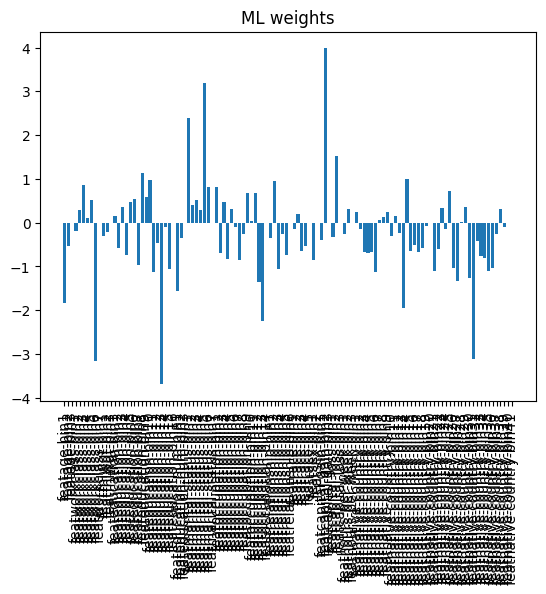

num of zero weights:  15
num of non-zero weights:  101
                      Feature    Weight
0                featage-bin1 -1.828278
1                featage-bin2 -0.542020
3          featworkclass-bin1 -0.180229
4          featworkclass-bin2  0.290798
5          featworkclass-bin3  0.859384
..                        ...       ...
109  featnative-country-bin35 -1.105834
110  featnative-country-bin36 -1.026449
111  featnative-country-bin37 -0.251992
112  featnative-country-bin38  0.301947
113  featnative-country-bin39 -0.093380

[101 rows x 2 columns]


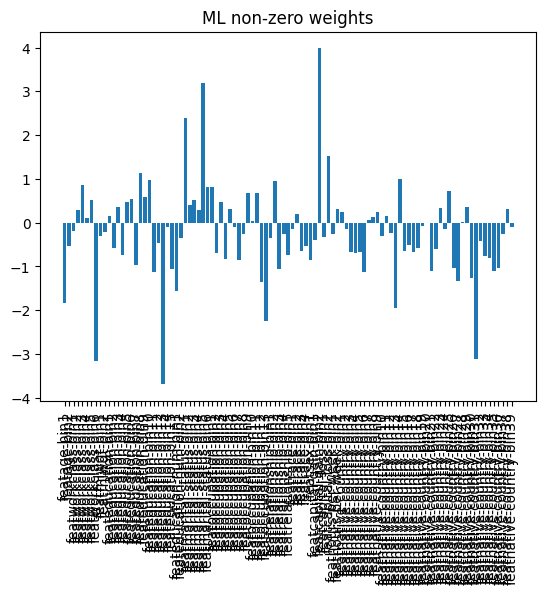

MSEs:  [0.1882664898906198, 0.17998011269472985, 0.1807029177718833, 0.1830238726790451, 0.1773872679045093, 0.17141909814323608, 0.1873342175066313, 0.17440318302387267, 0.17639257294429708, 0.17904509283819628]
accuracies:  [0.8117335101093802, 0.8200198873052701, 0.8192970822281167, 0.8169761273209549, 0.8226127320954907, 0.8285809018567639, 0.8126657824933687, 0.8255968169761273, 0.8236074270557029, 0.8209549071618037]
AUCs:  [0.8361790046340096, 0.839554909429381, 0.849991173874669, 0.8401353339217417, 0.8466885947507811, 0.8582740305053159, 0.8502870345058686, 0.8594321625617646, 0.8584980144208015, 0.8671810654227035]
mean MSE:  0.17979548253970207
mean accuracy:  0.8202045174602979
mean AUC:  0.8506221324027037
Execution time: 85.23484492301941 seconds


In [14]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [15]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 101



discretization thresholds

thresholds  {'age': [17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 87.0, 89.0], 'workclass': array(['0', '1', '2', '3', '4', '5', '6'], dtype=object), 'fnlwgt': [14323.5, 16852.5, 19020.5, 19258.0, 19348.5, 19402.5, 19450.5, 19505.5, 19610.0, 19726.0, 19799.5, 19873.0, 19906.5, 19985.5, 20077.5, 20099.5, 20105.0, 20144.0, 20237.5, 20302.0, 20315.5, 20328.0, 20385.5, 20453.5, 20488.0, 20509.0, 20522.5, 20605.0, 20702.0, 20761.5, 20802.0, 20881.0, 20954.5, 21025.5, 21098.0, 21127.5, 21164.0, 21240.0, 21389.0, 21549.0, 21662.0, 21745.0, 21824.0, 21866.0, 21891.0, 21974.0, 22048.5, 22104.5, 22154.5, 2

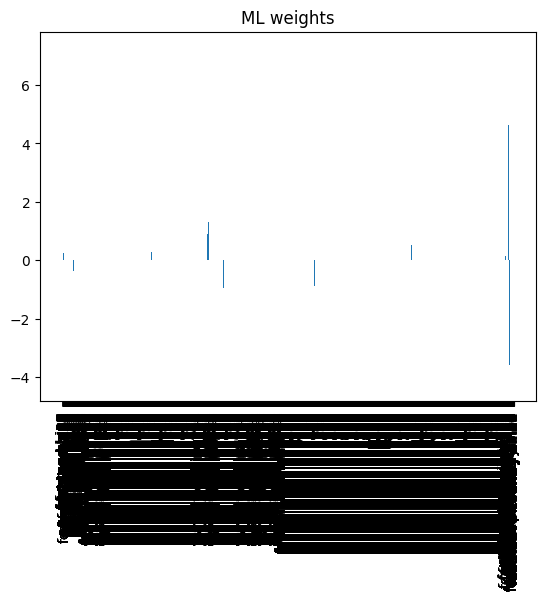

num of zero weights:  20060
num of non-zero weights:  685
                        Feature    Weight
0                  featage-bin1 -1.793336
1                  featage-bin2 -1.704526
2                  featage-bin3 -2.814831
3                  featage-bin4 -1.959261
4                  featage-bin5 -1.646449
...                         ...       ...
20736  featnative-country-bin33 -0.287383
20737  featnative-country-bin34 -0.764850
20738  featnative-country-bin35 -0.484279
20739  featnative-country-bin36 -0.362804
20741  featnative-country-bin38  0.082639

[685 rows x 2 columns]


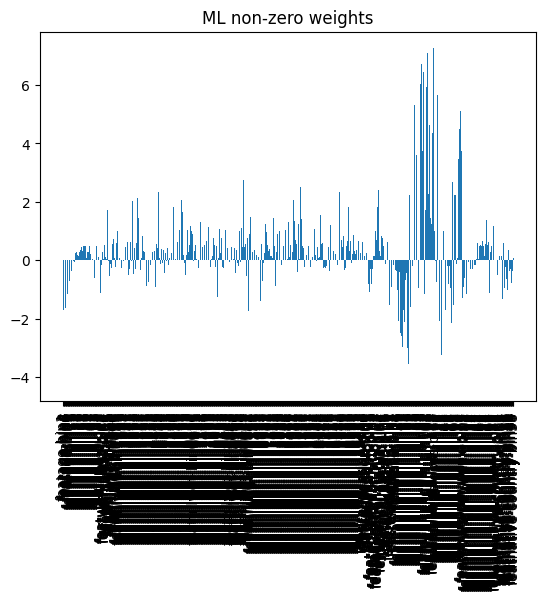

MSEs:  [0.18959231024196221, 0.18329466357308585, 0.1823607427055703, 0.1856763925729443, 0.17805039787798407, 0.17042440318302388, 0.1893236074270557, 0.17274535809018568, 0.17572944297082227, 0.17904509283819628]
accuracies:  [0.8104076897580378, 0.8167053364269141, 0.8176392572944297, 0.8143236074270557, 0.821949602122016, 0.8295755968169761, 0.8106763925729443, 0.8272546419098143, 0.8242705570291777, 0.8209549071618037]
AUCs:  [0.8362930038559943, 0.8384254944569347, 0.8510720800235363, 0.8414810238305384, 0.850990732004127, 0.8565039109002567, 0.8498455334021157, 0.8609988742015795, 0.8592775489928072, 0.8672186900174308]
mean MSE:  0.18062424114808306
mean accuracy:  0.8193757588519169
mean AUC:  0.851210689168532
Execution time: 809.274111032486 seconds


In [16]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_ml_model, adult_infbins_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
num of features:  14
categorical features:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')
aqui 1
inicio fit  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
aqui 2
aqui 3
categorical aqui:  [1, 3, 5, 6, 7, 8, 9, 13]
X shape[1]:  14
Feature non categorical  0
# 0  GLOBAL CAIM  8737.51765712619
Feature categorical  1
Feature non categorical  2
# 2  GLOBAL CAIM  8509.420504382462
Feature categorical  3
Feature non categorical  4
# 4  GLOBAL CAIM  9041.723265658027
Feature categorical  5
Feature categorical  6
Feature categorical  7
Feature categorical  8
Feature categorical  9
Feature non categorical  10
# 10  GLOBAL CAIM  9563.669697602407
Feature non categorical  11
# 11  GLOBAL CAIM  8827.42666102265
Feature non categorical  12
# 12  GLOBAL CAIM  8673.18344759418
Feature categorical  13

thresholds  {'ag

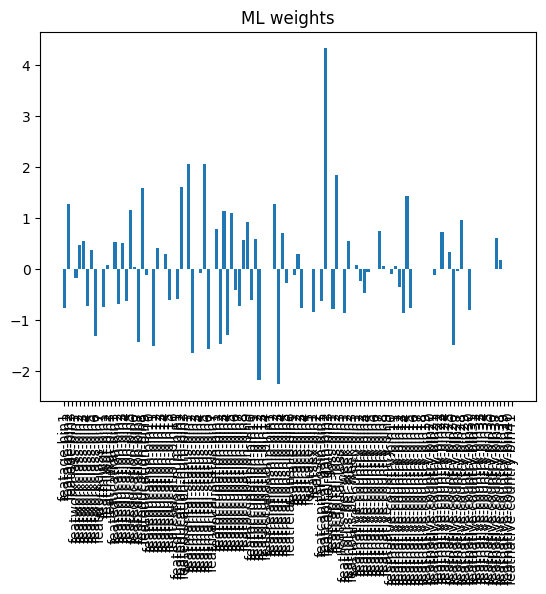

num of zero weights:  38
num of non-zero weights:  78
                      Feature    Weight
0                featage-bin1 -0.767797
1                featage-bin2  1.277433
3          featworkclass-bin1 -0.178781
4          featworkclass-bin2  0.466989
5          featworkclass-bin3  0.554737
..                        ...       ...
101  featnative-country-bin27 -0.040871
102  featnative-country-bin28  0.953662
104  featnative-country-bin30 -0.802357
111  featnative-country-bin37  0.609514
112  featnative-country-bin38  0.169561

[78 rows x 2 columns]


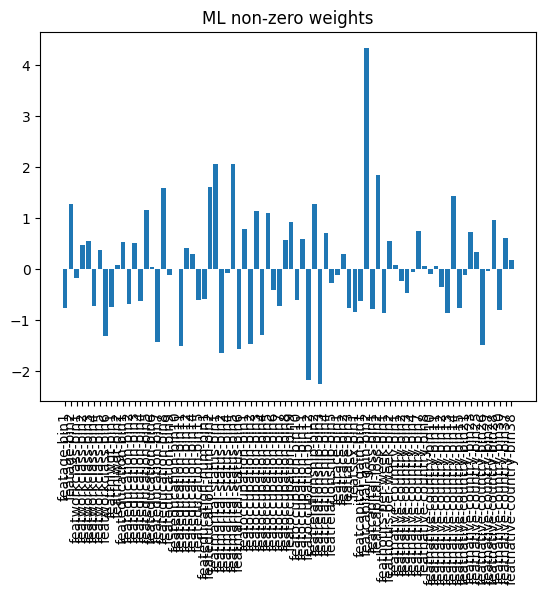

MSEs:  [0.18793503480278423, 0.18462048392442823, 0.1820291777188329, 0.1846816976127321, 0.17771883289124668, 0.17141909814323608, 0.1876657824933687, 0.1773872679045093, 0.17440318302387267, 0.1783819628647215]
accuracies:  [0.8120649651972158, 0.8153795160755718, 0.8179708222811671, 0.8153183023872679, 0.8222811671087533, 0.8285809018567639, 0.8123342175066313, 0.8226127320954907, 0.8255968169761273, 0.8216180371352785]
AUCs:  [0.8402776880017581, 0.837966559444718, 0.8510985583995294, 0.8415557516916741, 0.8458414534851251, 0.8583175339429693, 0.8503675746539566, 0.8512300009112206, 0.8595079996355117, 0.8672081081001637]
mean MSE:  0.18062425213797323
mean accuracy:  0.8193757478620268
mean AUC:  0.8503371228266626
Execution time: 91.95907998085022 seconds


In [17]:
start_time = time.time()
scorecard = Scorecard()
adult_caim_diff_ml_model, adult_caim_diff_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [18]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 78


In [ ]:
start_time = time.time()
scorecard = Scorecard()
adult_infbins_diff_ml_model, adult_infbins_diff_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=77)
scorecard.cross_val_score()
end_time = time.time() 
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds

thresholds  {'age': [17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 87.0, 89.0], 'workclass': array(['0', '1', '2', '3', '4', '5', '6'], dtype=object), 'fnlwgt': [14323.5, 16852.5, 19020.5, 19258.0, 19348.5, 19402.5, 19450.5, 19505.5, 19610.0, 19726.0, 19799.5, 19873.0, 19906.5, 19985.5, 20077.5, 20099.5, 20105.0, 20144.0, 20237.5, 20302.0, 20315.5, 20328.0, 20385.5, 20453.5, 20488.0, 20509.0, 20522.5, 20605.0, 20702.0, 20761.5, 20802.0, 20881.0, 20954.5, 21025.5, 21098.0, 21127.5, 21164.0, 21240.0, 21389.0, 21549.0, 21662.0, 21745.0, 21824.0, 21866.0, 21891.0, 21974.0, 22048.5, 22104.5, 22154.5, 2

## mushroom
mushrooms described in terms of physical characteristics; classification: poisonous or edible

https://archive.ics.uci.edu/dataset/73/mushroom

num rows with nulls:  2480
num observations:  5644
num features:  22
target distribution:  poisonous
0    3488
1    2156
Name: count, dtype: int64


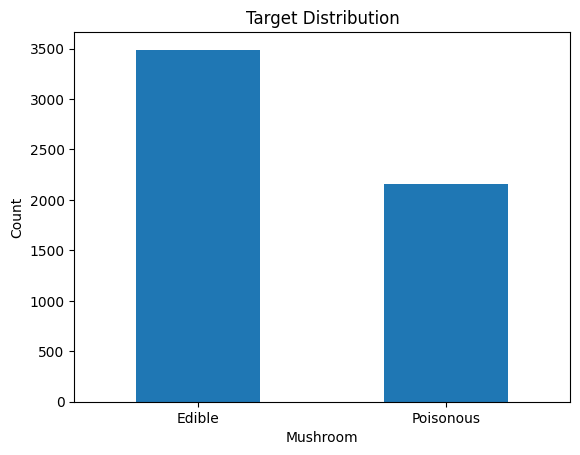

In [ ]:
# fetch dataset 
mushroom_data = fetch_ucirepo(id=73) 

# data (as pandas dataframes) 
mushroom_X = mushroom_data.data.features 
mushroom_y = mushroom_data.data.targets.squeeze().map({'p': 1, 'e': 0}).astype(int)
  
# metadata 
# print(mushroom_data.metadata) 
  
# variable information 
# print(mushroom_data.variables) 

# substitute '?' with NaN and drop rows with nulls
mushroom_combined = pd.concat([mushroom_X, mushroom_y], axis=1)
mushroom_combined = mushroom_combined.replace('?', pd.NA)
print("num rows with nulls: ", mushroom_combined.isnull().sum().sum())
mushroom_combined = mushroom_combined.dropna().reset_index(drop=True)
mushroom_X = mushroom_combined.iloc[:, :-1]
mushroom_y = mushroom_combined.iloc[:, -1]

print("num observations: ", mushroom_y.count())
print("num features: ", mushroom_X.shape[1])
print("target distribution: ", mushroom_y.value_counts())
# show target distribution
mushroom_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Mushroom')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible', 'Poisonous'], rotation=0)
plt.show()

In [ ]:
categorical_columns = mushroom_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mushroom_X[col] = mushroom_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mushroom_X[col].unique()}")

categorical columns:  Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
Column cap-shape encoded as: [5 0 4 2 3 1]
Column cap-surface encoded as: [2 3 0 1]
Column cap-color encoded as: [4 7 6 3 2 5 0 1]
Column bruises encoded as: [1 0]
Column odor encoded as: [6 0 3 5 2 1 4]
Column gill-attachment encoded as: [1 0]
Column gill-spacing encoded as: [0 1]
Column gill-size encoded as: [1 0]
Column gill-color encoded as: [2 3 0 4 7 1 6 5 8]
Column stalk-shape encoded as: [0 1]
Column stalk-root encoded as: [2 1 0 3]
Column stalk-surface-above-ring encoded as: [2 0 1 3]
Column stalk-surface-below-ring encoded as: [2 0 3 1]



discretization thresholds
num of features:  22
categorical features:  Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
aqui 1
inicio fit  ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
aqui 2
aqui 3
categorical aqui:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
X shape[1]: 

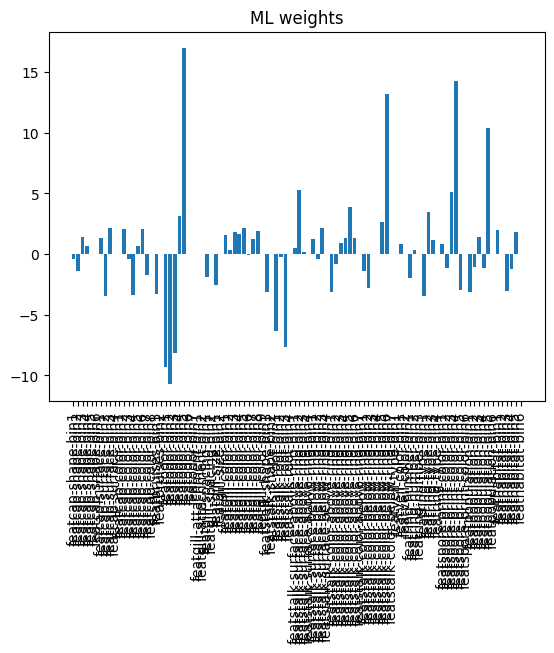

num of zero weights:  28
num of non-zero weights:  70
                 Feature     Weight
0     featcap-shape-bin1  -0.379451
1     featcap-shape-bin2  -1.357628
2     featcap-shape-bin3   1.361830
3     featcap-shape-bin4   0.636627
6   featcap-surface-bin1   1.340870
..                   ...        ...
90   featpopulation-bin5  10.388417
92      feathabitat-bin1   1.980871
94      feathabitat-bin3  -3.004274
95      feathabitat-bin4  -1.202115
96      feathabitat-bin5   1.795947

[70 rows x 2 columns]


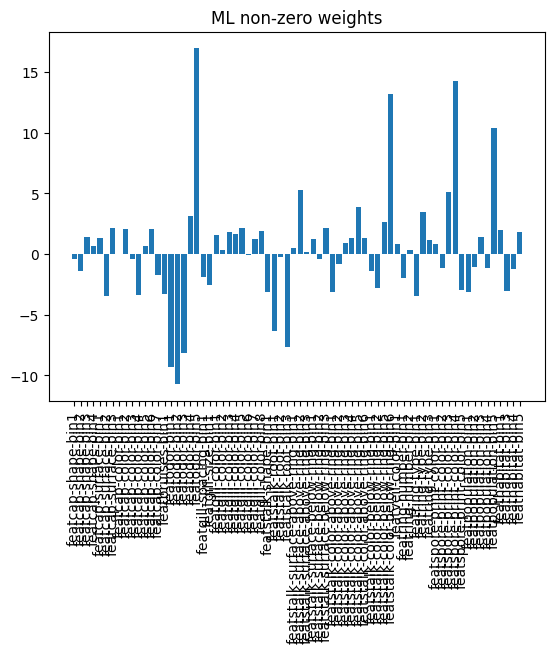

MSEs:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12588652482269502]
accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.874113475177305]
AUCs:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7953488372093023]
mean MSE:  0.012588652482269503
mean accuracy:  0.9874113475177305
mean AUC:  0.9795348837209301
Execution time: 6.744351863861084 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_1ook_ml_model, mushroom_caim_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 70



discretization thresholds

thresholds  {'cap-shape': array(['0', '1', '2', '3', '4', '5'], dtype=object), 'cap-surface': array(['0', '1', '2', '3'], dtype=object), 'cap-color': array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype=object), 'bruises': array(['0', '1'], dtype=object), 'odor': array(['0', '1', '2', '3', '4', '5', '6'], dtype=object), 'gill-attachment': array(['0', '1'], dtype=object), 'gill-spacing': array(['0', '1'], dtype=object), 'gill-size': array(['0', '1'], dtype=object), 'gill-color': array(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype=object), 'stalk-shape': array(['0', '1'], dtype=object), 'stalk-root': array(['0', '1', '2', '3'], dtype=object), 'stalk-surface-above-ring': array(['0', '1', '2', '3'], dtype=object), 'stalk-surface-below-ring': array(['0', '1', '2', '3'], dtype=object), 'stalk-color-above-ring': array(['0', '1', '2', '3', '4', '5', '6'], dtype=object), 'stalk-color-below-ring': array(['0', '1', '2', '3', '4', '5', '6'], dtype=object), 'veil

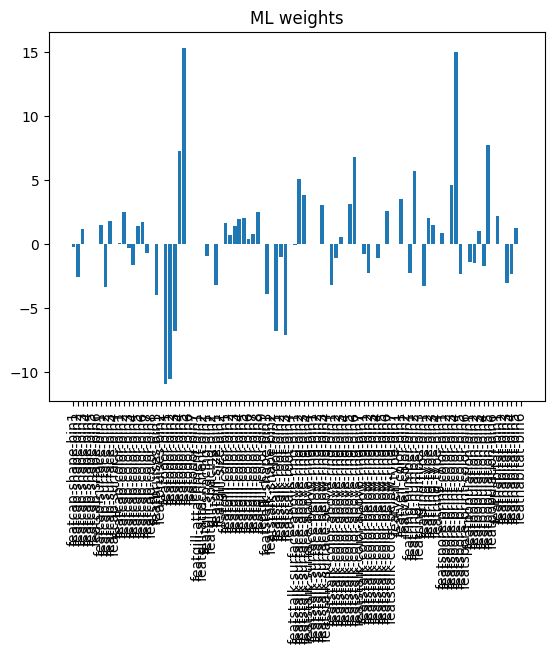

num of zero weights:  32
num of non-zero weights:  66
                 Feature    Weight
0     featcap-shape-bin1 -0.202548
1     featcap-shape-bin2 -2.579394
2     featcap-shape-bin3  1.158044
6   featcap-surface-bin1  1.479686
7   featcap-surface-bin2 -3.369046
..                   ...       ...
90   featpopulation-bin5  7.719711
92      feathabitat-bin1  2.195895
94      feathabitat-bin3 -3.013298
95      feathabitat-bin4 -2.325955
96      feathabitat-bin5  1.287184

[66 rows x 2 columns]


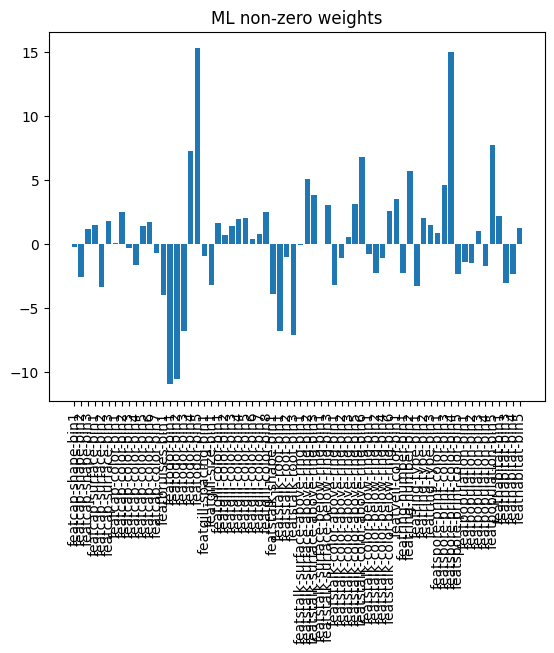

MSEs:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11879432624113476]
accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8812056737588653]
AUCs:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7953488372093023]
mean MSE:  0.011879432624113475
mean accuracy:  0.9881205673758865
mean AUC:  0.9795348837209301
Execution time: 5.894430875778198 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_1ook_ml_model, mushroom_infbins_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_diff_ml_model, mushroom_caim_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_diff_ml_model, mushroom_infbins_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## spambase
classifying Email as Spam or Non-Spam

https://archive.ics.uci.edu/dataset/94/spambase

num observations:  Class    4601
dtype: int64
num features:  57
target distribution:  Class
0        2788
1        1813
Name: count, dtype: int64


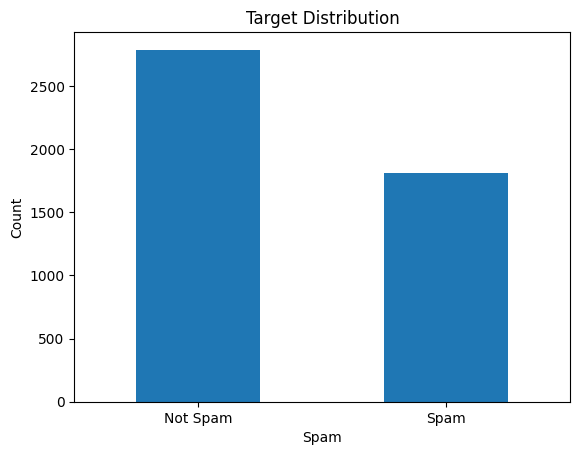

In [33]:
# fetch dataset 
spambase_data = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
spambase_X = spambase_data.data.features 
spambase_y = spambase_data.data.targets 
  
# metadata 
# print(spambase_data.metadata) 
  
# variable information 
# print(spambase_data.variables) 

print("num observations: ", spambase_y.count())
print("num features: ", spambase_X.shape[1])
print("target distribution: ", spambase_y.value_counts())
# show target distribution
spambase_y['Class'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

In [ ]:
categorical_columns = spambase_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    spambase_X[col] = spambase_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {spambase_X[col].unique()}")


discretization thresholds
num of features:  57
categorical features:  Index([], dtype='object')
aqui 1
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  57
Feature non categorical  0
# 0  GLOBAL CAIM  1010.718765710768
Feature non categorical  1
# 1  GLOBAL CAIM  1078.6892533542837
Feature non categorical  2
# 2  GLOBAL CAIM  1121.3963358408153
Feature non categorical  3
# 3  GLOBAL CAIM  865.866301249726
Feature non categorical  4
# 4  GLOBAL CAIM  1198.1306519804184
Feature non categorical  5
# 5  GLOBAL CAIM  1087.3301583074074
Feature non categorical  6
# 6  GLOBAL CAIM  1351.6240564116788
Feature non categorical  7
# 7  GLOBAL CAIM  1117.1923932617765
Feature non categorical  8
# 8  GLOBAL CAIM  1069.7328387888087
Feature non categorical  9
# 9  GLOBAL CAIM  1076.7821490644271
Feature non categorical  10
# 10  GLOBAL CAIM  1130.984593111285
Feature non categorical  11
# 11  GLOBAL CAIM  883.1618729593126
Feature non categorical  12
# 12  GLOBAL CAIM  989.20005101872

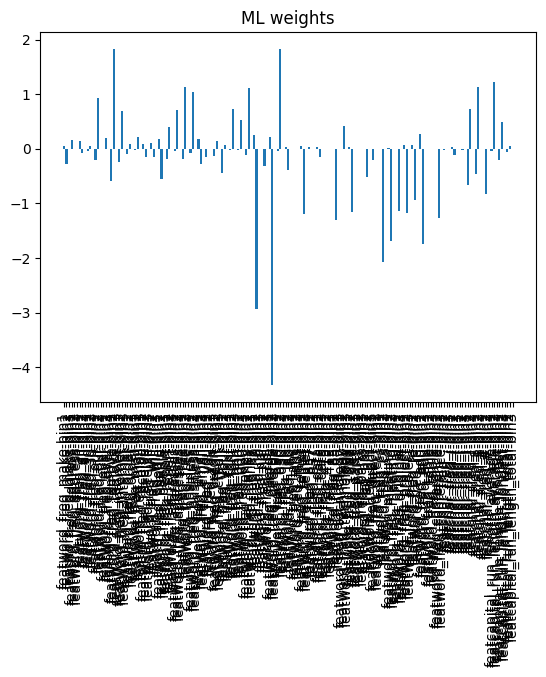

num of zero weights:  73
num of non-zero weights:  98
                                 Feature    Weight
0                featword_freq_make-bin1  0.052918
1                featword_freq_make-bin2 -0.284226
3             featword_freq_address-bin1  0.153137
6                 featword_freq_all-bin1  0.148637
7                 featword_freq_all-bin2 -0.071786
..                                   ...       ...
163  featcapital_run_length_average-bin2  1.215516
165  featcapital_run_length_longest-bin1 -0.199765
166  featcapital_run_length_longest-bin2  0.489177
168    featcapital_run_length_total-bin1 -0.063007
169    featcapital_run_length_total-bin2  0.045726

[98 rows x 2 columns]


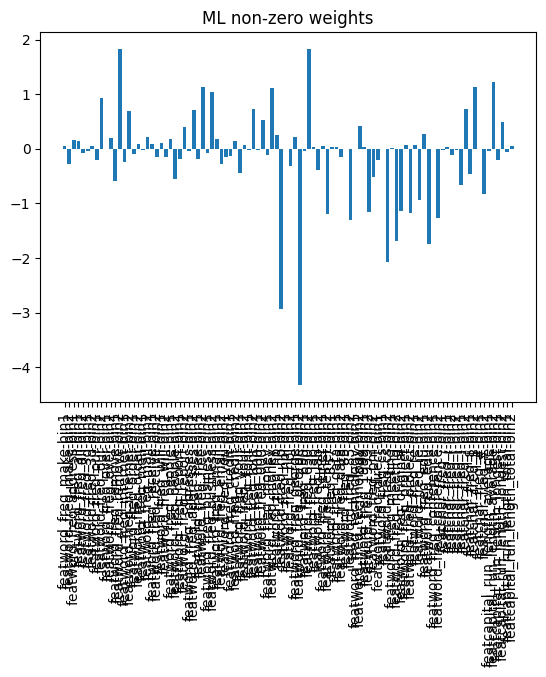

MSEs:  [0.06941431670281996, 0.08043478260869565, 0.08260869565217391, 0.05652173913043478, 0.06304347826086956, 0.07173913043478261, 0.04565217391304348, 0.058695652173913045, 0.15, 0.1391304347826087]
accuracies:  [0.93058568329718, 0.9195652173913044, 0.9173913043478261, 0.9434782608695652, 0.9369565217391305, 0.9282608695652174, 0.9543478260869566, 0.941304347826087, 0.85, 0.8608695652173913]
AUCs:  [0.9741521918941274, 0.9711241995414659, 0.974622499802356, 0.9873462840848334, 0.9667320144953364, 0.9692667181528348, 0.9918810273470762, 0.9801184181864988, 0.9268896413790373, 0.9063149765341888]
mean MSE:  0.08172404036593417
mean accuracy:  0.9182759596340659
mean AUC:  0.9648447971417754
Execution time: 6.2696311473846436 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_1ook_ml_model, spambase_caim_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [35]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 98



discretization thresholds

thresholds  {'word_freq_make': [0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.07500000000000001, 0.08499999999999999, 0.095, 0.10500000000000001, 0.11499999999999999, 0.125, 0.135, 0.14500000000000002, 0.155, 0.165, 0.175, 0.185, 0.195, 0.20500000000000002, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265, 0.275, 0.28500000000000003, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445, 0.455, 0.46499999999999997, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535, 0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625, 0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715, 0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805, 0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895, 0.915, 0.94, 0.955, 0.965, 0.975, 0.985, 0.995, 1.005, 1.0150000000000001, 1.025, 1.0350000000000001, 1.045, 1.0550000000000002, 1.065, 1.0750000000000002, 1.085, 1.1, 1.1150000000000002, 1.13, 1.15

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ML best parameters:  {'C': 1.0}
ML best alpha:  1.0
ML weights:
                                    Feature  Weight
0                  featword_freq_make-bin1     0.0
1                  featword_freq_make-bin2     0.0
2                  featword_freq_make-bin3     0.0
3                  featword_freq_make-bin4     0.0
4                  featword_freq_make-bin5     0.0
...                                    ...     ...
15032  featcapital_run_length_total-bin914     0.0
15033  featcapital_run_length_total-bin915     0.0
15034  featcapital_run_length_total-bin916     0.0
15035  featcapital_run_length_total-bin917     0.0
15036  featcapital_run_length_total-bin918     0.0

[15037 rows x 2 columns]


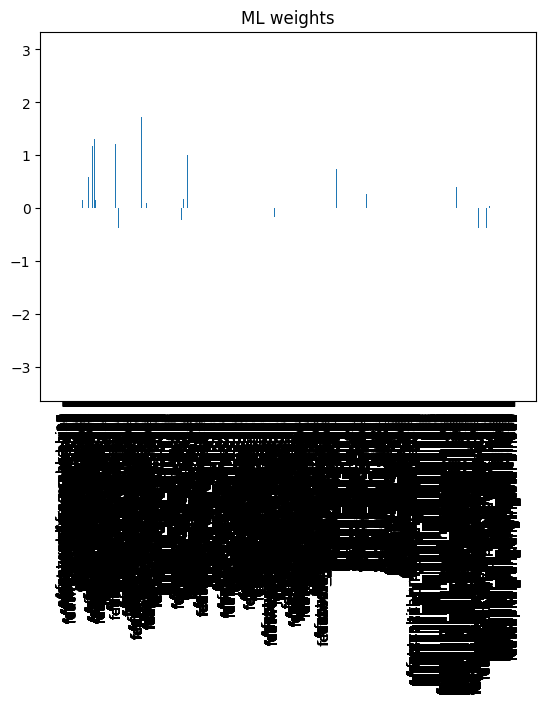

num of zero weights:  13914
num of non-zero weights:  1123
                                   Feature    Weight
5                  featword_freq_make-bin6 -0.478502
10                featword_freq_make-bin11 -0.080435
13                featword_freq_make-bin14  1.125718
25                featword_freq_make-bin26 -0.536957
26                featword_freq_make-bin27  0.015988
...                                    ...       ...
14377  featcapital_run_length_total-bin259  2.124159
14393  featcapital_run_length_total-bin275  0.242350
14404  featcapital_run_length_total-bin286  0.649361
14413  featcapital_run_length_total-bin295  0.306575
14601  featcapital_run_length_total-bin483  0.258540

[1123 rows x 2 columns]


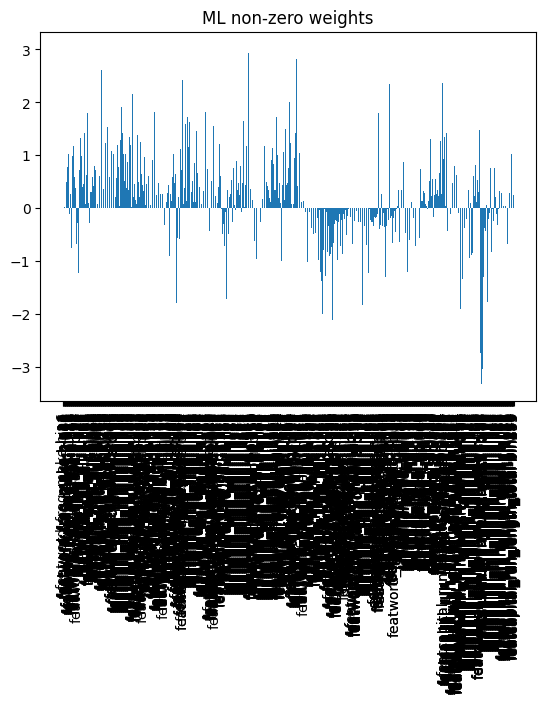

MSEs:  [0.06941431670281996, 0.08043478260869565, 0.08260869565217391, 0.05652173913043478, 0.06304347826086956, 0.07173913043478261, 0.04565217391304348, 0.058695652173913045, 0.15, 0.1391304347826087]
accuracies:  [0.93058568329718, 0.9195652173913044, 0.9173913043478261, 0.9434782608695652, 0.9369565217391305, 0.9282608695652174, 0.9543478260869566, 0.941304347826087, 0.85, 0.8608695652173913]
AUCs:  [0.9741324983260468, 0.9711241995414659, 0.974622499802356, 0.9873660864571575, 0.9667320144953366, 0.9692865205251591, 0.9918810273470762, 0.9801184181864988, 0.9268896413790373, 0.9063545812788373]
mean MSE:  0.08172404036593417
mean accuracy:  0.9182759596340659
mean AUC:  0.9648507487338971
Execution time: 100.71556496620178 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_infbins_1ook_ml_model, spambase_infbins_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
num of features:  57
categorical features:  Index([], dtype='object')
aqui 1
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  57
Feature non categorical  0
# 0  GLOBAL CAIM  1010.718765710768
Feature non categorical  1
# 1  GLOBAL CAIM  1078.6892533542837
Feature non categorical  2
# 2  GLOBAL CAIM  1121.3963358408153
Feature non categorical  3
# 3  GLOBAL CAIM  865.866301249726
Feature non categorical  4
# 4  GLOBAL CAIM  1198.1306519804184
Feature non categorical  5
# 5  GLOBAL CAIM  1087.3301583074074
Feature non categorical  6
# 6  GLOBAL CAIM  1351.6240564116788
Feature non categorical  7
# 7  GLOBAL CAIM  1117.1923932617765
Feature non categorical  8
# 8  GLOBAL CAIM  1069.7328387888087
Feature non categorical  9
# 9  GLOBAL CAIM  1076.7821490644271
Feature non categorical  10
# 10  GLOBAL CAIM  1130.984593111285
Feature non categorical  11
# 11  GLOBAL CAIM  883.1618729593126
Feature non categorical  12
# 12  GLOBAL CAIM  989.20005101872

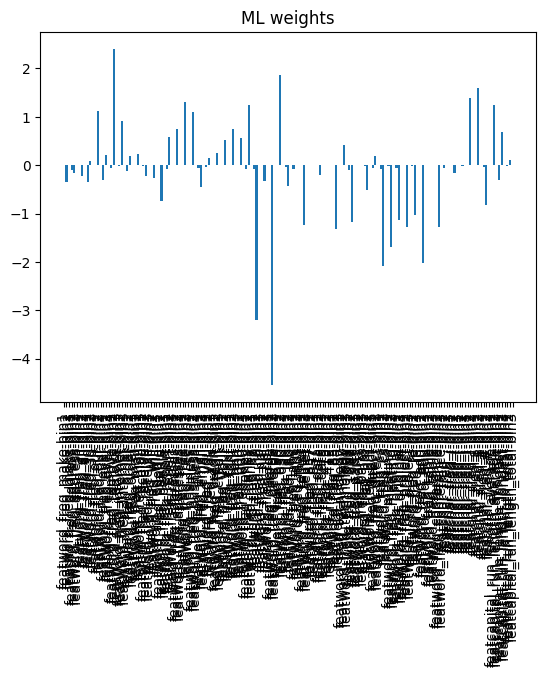

num of zero weights:  93
num of non-zero weights:  78
                                 Feature    Weight
1                featword_freq_make-bin2 -0.339121
3             featword_freq_address-bin1 -0.097428
4             featword_freq_address-bin2 -0.154248
7                 featword_freq_all-bin2 -0.222079
9                  featword_freq_3d-bin1 -0.347650
..                                   ...       ...
163  featcapital_run_length_average-bin2  1.249151
165  featcapital_run_length_longest-bin1 -0.307739
166  featcapital_run_length_longest-bin2  0.688227
168    featcapital_run_length_total-bin1 -0.014245
169    featcapital_run_length_total-bin2  0.108797

[78 rows x 2 columns]


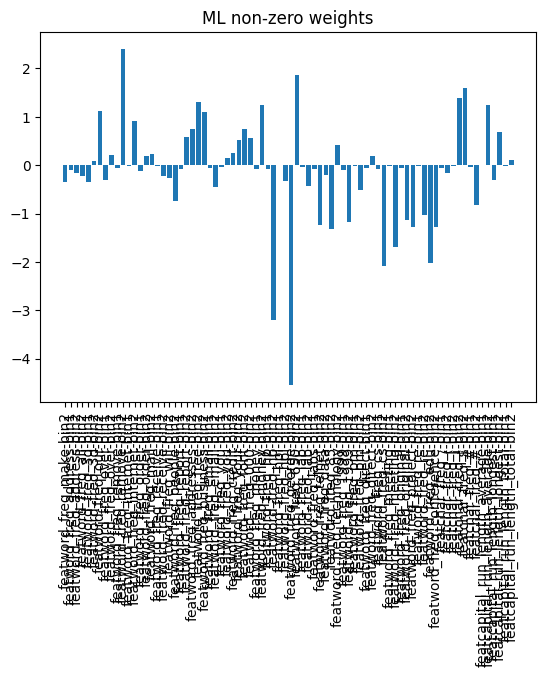

MSEs:  [0.06941431670281996, 0.08043478260869565, 0.08260869565217391, 0.05652173913043478, 0.06304347826086956, 0.07173913043478261, 0.04565217391304348, 0.058695652173913045, 0.15, 0.1391304347826087]
accuracies:  [0.93058568329718, 0.9195652173913044, 0.9173913043478261, 0.9434782608695652, 0.9369565217391305, 0.9282608695652174, 0.9543478260869566, 0.941304347826087, 0.85, 0.8608695652173913]
AUCs:  [0.9741324983260468, 0.971163728357973, 0.974622499802356, 0.9873660864571575, 0.9667320144953366, 0.9692667181528348, 0.9918810273470762, 0.9801184181864988, 0.926869839006713, 0.9063149765341888]
mean MSE:  0.08172404036593417
mean accuracy:  0.9182759596340659
mean AUC:  0.9648467806666183
Execution time: 5.3009278774261475 seconds


In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_caim_diff_ml_model, spambase_caim_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [38]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 78



discretization thresholds

thresholds  {'word_freq_make': [0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.07500000000000001, 0.08499999999999999, 0.095, 0.10500000000000001, 0.11499999999999999, 0.125, 0.135, 0.14500000000000002, 0.155, 0.165, 0.175, 0.185, 0.195, 0.20500000000000002, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265, 0.275, 0.28500000000000003, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445, 0.455, 0.46499999999999997, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535, 0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625, 0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715, 0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805, 0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895, 0.915, 0.94, 0.955, 0.965, 0.975, 0.985, 0.995, 1.005, 1.0150000000000001, 1.025, 1.0350000000000001, 1.045, 1.0550000000000002, 1.065, 1.0750000000000002, 1.085, 1.1, 1.1150000000000002, 1.13, 1.15

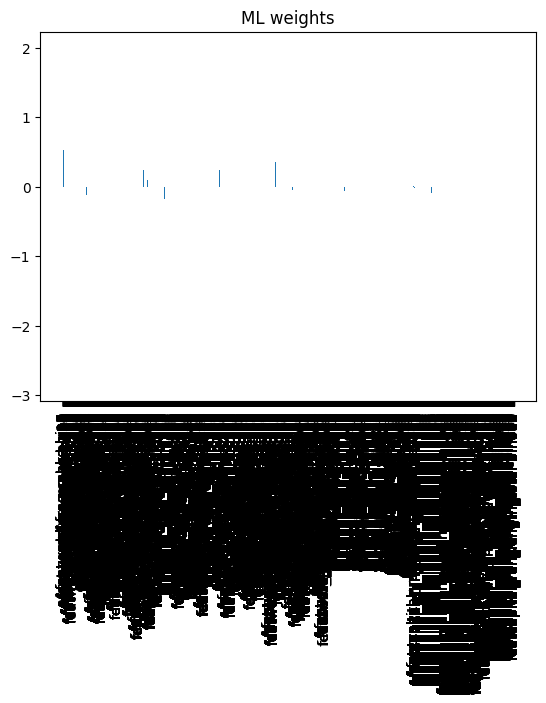

num of zero weights:  14218
num of non-zero weights:  819
                                   Feature    Weight
9                 featword_freq_make-bin10 -0.054446
12                featword_freq_make-bin13 -0.159118
15                featword_freq_make-bin16 -0.489404
24                featword_freq_make-bin25  0.534046
34                featword_freq_make-bin35 -0.052277
...                                    ...       ...
14755  featcapital_run_length_total-bin637  0.566497
14761  featcapital_run_length_total-bin643  0.000001
14965  featcapital_run_length_total-bin847  0.055852
14966  featcapital_run_length_total-bin848  0.000808
14971  featcapital_run_length_total-bin853  0.120991

[819 rows x 2 columns]


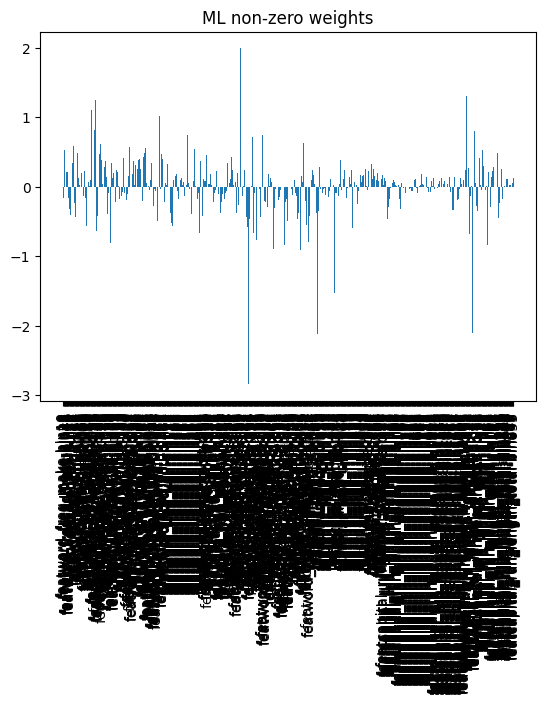

MSEs:  [0.06941431670281996, 0.08043478260869565, 0.08260869565217391, 0.05652173913043478, 0.06304347826086956, 0.07173913043478261, 0.04565217391304348, 0.058695652173913045, 0.15, 0.1391304347826087]
accuracies:  [0.93058568329718, 0.9195652173913044, 0.9173913043478261, 0.9434782608695652, 0.9369565217391305, 0.9282608695652174, 0.9543478260869566, 0.941304347826087, 0.85, 0.8608695652173913]
AUCs:  [0.9741521918941275, 0.9711241995414658, 0.974622499802356, 0.9873462840848334, 0.9667122121230123, 0.9692865205251591, 0.9918810273470762, 0.9801184181864988, 0.9268896413790373, 0.906334778906513]
mean MSE:  0.08172404036593417
mean accuracy:  0.9182759596340659
mean AUC:  0.9648467773790081
Execution time: 141.0900001525879 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_diff_ml_model, spambase_infbins_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## telemarketing
set of possible advertisements on Internet pages

https://archive.ics.uci.edu/dataset/51/internet+advertisements

num rows with nulls:  1804
num observations:  2368
num features:  1558
target distribution:  ad.
0    1983
1     385
Name: count, dtype: int64


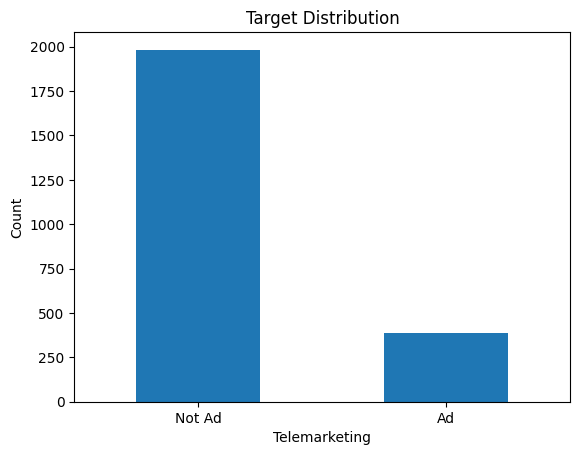

In [ ]:
# load dataset from file. target is last column
telemarketing_data = pd.read_csv('datasets/internet+advertisements/ad.data', dtype=str)
telemarketing_X = telemarketing_data.iloc[:, :-1]
telemarketing_y = telemarketing_data.iloc[:, -1]

telemarketing_y = telemarketing_y.map({'nonad.': 0, 'ad.': 1})

#  substitute '   ?' with NaN and drop rows with nulls
telemarketing_combined = pd.concat([telemarketing_X, telemarketing_y], axis=1)
telemarketing_combined = telemarketing_combined.replace('   ?', pd.NA)
print("num rows with nulls: ", telemarketing_combined.isnull().sum().sum())
telemarketing_combined = telemarketing_combined.dropna().reset_index(drop=True)
telemarketing_X = telemarketing_combined.iloc[:, :-1]
telemarketing_y = telemarketing_combined.iloc[:, -1]

print("num observations: ", telemarketing_y.count())
print("num features: ", telemarketing_X.shape[1])
print("target distribution: ", telemarketing_y.value_counts())
# show target distribution
telemarketing_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Telemarketing')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Ad', 'Ad'], rotation=0)
plt.show()

In [ ]:
categorical_columns = telemarketing_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    telemarketing_X[col] = telemarketing_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {telemarketing_X[col].unique()}")


discretization thresholds
num of features:  1558
categorical features:  Index([' 125', ' 125.1', '   1.0', '1', '0', '0.1', '0.2', '0.3', '0.4', '0.5',
       ...
       '0.1531', '0.1532', '0.1533', '0.1534', '0.1535', '0.1536', '0.1537',
       '0.1538', '0.1539', '0.1540'],
      dtype='object', length=1558)
aqui 1
inicio fit  [' 125', ' 125.1', '   1.0', '1', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31', '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.43', '0.44', '0.45', '0.46', '0.47', '0.48', '0.49', '0.50', '0.51', '0.52', '0.53', '0.54', '0.55', '0.56', '0.57', '0.58', '0.59', '0.60', '0.61', '0.62', '0.63', '0.64', '0.65', '0.66', '0.67', '0.68', '0.69', '0.70', '0.71', '0.72', '0.73', '0.74', '0.75', '0.76', '0.77', '0.78', '0.79', '0.80

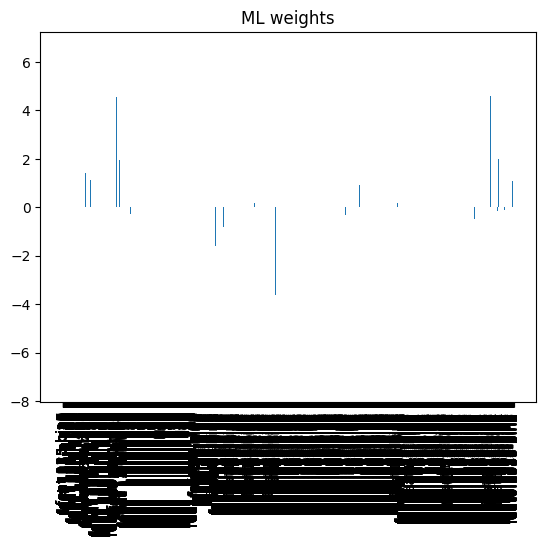

num of zero weights:  4159
num of non-zero weights:  232
              Feature    Weight
0       feat 125-bin1  0.084408
1       feat 125-bin2  2.104514
3       feat 125-bin4  0.585017
4       feat 125-bin5  1.280336
5       feat 125-bin6  0.590928
...               ...       ...
4353  feat0.1522-bin1  1.360408
4359  feat0.1525-bin1 -0.669771
4379  feat0.1535-bin1  1.101423
4383  feat0.1537-bin1  1.074117
4387  feat0.1539-bin1  0.198440

[232 rows x 2 columns]


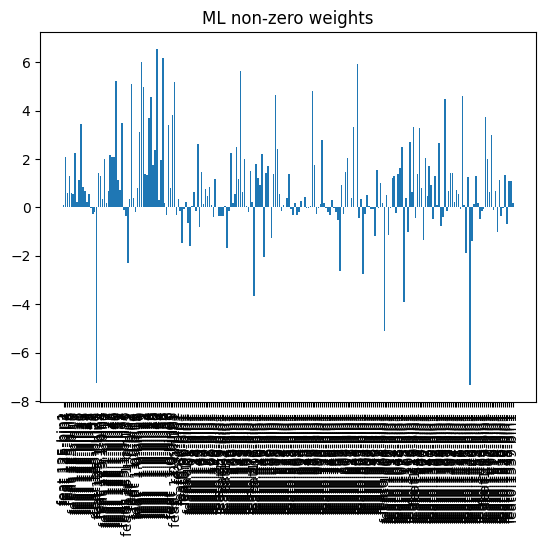

entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entr

ValueError: could not convert string to float: '   ?'

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_1ook_ml_model, telemarketing_caim_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_1ook_ml_model, telemarketing_infbins_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_diff_ml_model, telemarketing_caim_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')

scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_diff_ml_model, telemarketing_infbins_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## breast cancer
predict if a breast tumor is malignant or benign

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

num rows with nulls:  16
num observations:  683
num features:  9
target distribution:  Class
0    444
1    239
Name: count, dtype: int64


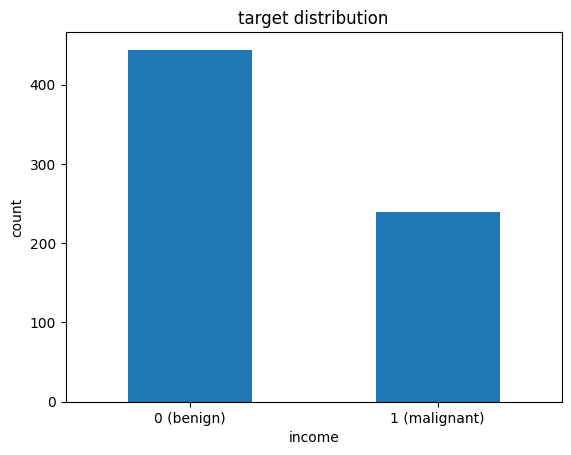

In [42]:
# fetch dataset 
breast_cancer_data = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
breast_cancer_X = breast_cancer_data.data.features 
breast_cancer_y = breast_cancer_data.data.targets 

breast_cancer_y.loc[:,'Class'] = breast_cancer_y['Class'].map({4: 1, 2: 0})

# drop rows with nulls
breast_cancer_combined = pd.concat([breast_cancer_X, breast_cancer_y], axis=1)
print("num rows with nulls: ", breast_cancer_combined.isnull().sum().sum())
breast_cancer_combined = breast_cancer_combined.dropna()
breast_cancer_combined = breast_cancer_combined.reset_index(drop=True)
breast_cancer_X = breast_cancer_combined.iloc[:, :-1]
breast_cancer_y = breast_cancer_combined.iloc[:, -1]

# metadata 
# print(breast_cancer_data.metadata) 
  
# variable information 
# print(breast_cancer_data.variables) 

print("num observations: ", breast_cancer_y.count())
print("num features: ", breast_cancer_X.shape[1])
print("target distribution: ", breast_cancer_y.value_counts())
breast_cancer_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (benign)', '1 (malignant)'], rotation=0)
plt.show()


In [ ]:
categorical_columns = breast_cancer_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    breast_cancer_X[col] = breast_cancer_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {breast_cancer_X[col].unique()}")


discretization thresholds
num of features:  9
categorical features:  Index([], dtype='object')
aqui 1
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  9
Feature non categorical  0
# 0  GLOBAL CAIM  252.36889617486338
Feature non categorical  1
# 1  GLOBAL CAIM  295.24042053740885
Feature non categorical  2
# 2  GLOBAL CAIM  292.41902267578087
Feature non categorical  3
# 3  GLOBAL CAIM  256.9620565454012
Feature non categorical  4
# 4  GLOBAL CAIM  278.09900416440337
Feature non categorical  5
# 5  GLOBAL CAIM  284.74833997343956
Feature non categorical  6
# 6  GLOBAL CAIM  281.41383247205863
Feature non categorical  7
# 7  GLOBAL CAIM  275.0902752931823
Feature non categorical  8
# 8  GLOBAL CAIM  198.78501868975016

thresholds  {'Clump_thickness': [1.0, 5.0, 11.0], 'Uniformity_of_cell_size': [1.0, 3.0, 11.0], 'Uniformity_of_cell_shape': [1.0, 3.0, 11.0], 'Marginal_adhesion': [1.0, 3.0, 11.0], 'Single_epithelial_cell_size': [1.0, 2.0, 11.0], 'Bare_nuclei': [1.0, 2.0, 1

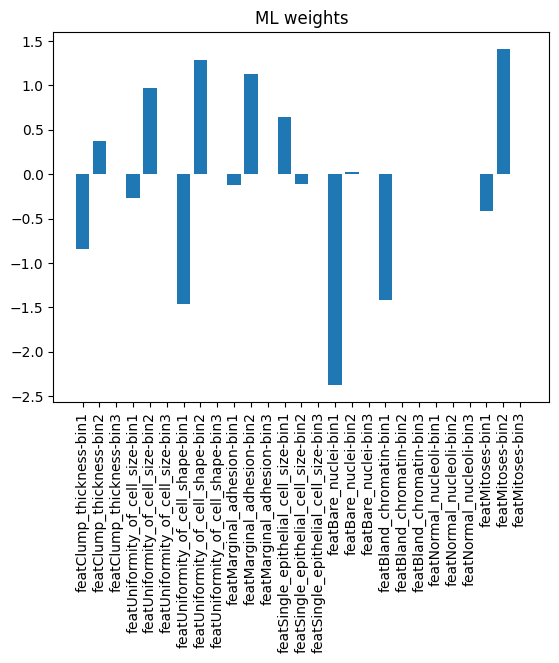

num of zero weights:  12
num of non-zero weights:  15
                                 Feature    Weight
0               featClump_thickness-bin1 -0.846273
1               featClump_thickness-bin2  0.371344
3       featUniformity_of_cell_size-bin1 -0.263130
4       featUniformity_of_cell_size-bin2  0.967026
6      featUniformity_of_cell_shape-bin1 -1.466278
7      featUniformity_of_cell_shape-bin2  1.287486
9             featMarginal_adhesion-bin1 -0.117087
10            featMarginal_adhesion-bin2  1.132979
12  featSingle_epithelial_cell_size-bin1  0.640473
13  featSingle_epithelial_cell_size-bin2 -0.115382
15                  featBare_nuclei-bin1 -2.374460
16                  featBare_nuclei-bin2  0.020541
18              featBland_chromatin-bin1 -1.411520
24                      featMitoses-bin1 -0.413177
25                      featMitoses-bin2  1.410828


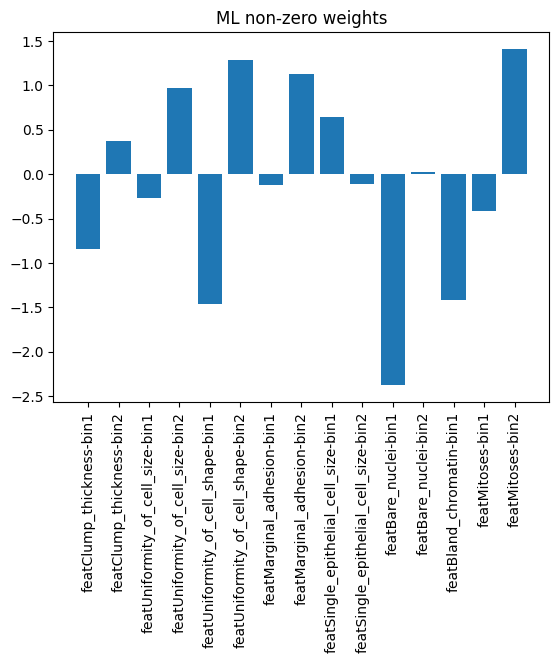

MSEs:  [0.07246376811594203, 0.028985507246376812, 0.057971014492753624, 0.058823529411764705, 0.0, 0.029411764705882353, 0.04411764705882353, 0.0, 0.029411764705882353, 0.0]
accuracies:  [0.927536231884058, 0.9710144927536232, 0.9420289855072463, 0.9411764705882353, 1.0, 0.9705882352941176, 0.9558823529411765, 1.0, 0.9705882352941176, 1.0]
AUCs:  [0.9879629629629629, 0.9990740740740741, 0.9796296296296296, 0.9922705314009661, 1.0, 0.9933712121212122, 0.9981060606060607, 1.0, 0.9990530303030303, 1.0]
mean MSE:  0.03211849957374254
mean accuracy:  0.9678815004262574
mean AUC:  0.9949467501097935
Execution time: 0.42996811866760254 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_1ook_ml_model, breast_cancer_caim_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [44]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 15



discretization thresholds

thresholds  {'Clump_thickness': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Uniformity_of_cell_size': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Uniformity_of_cell_shape': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Marginal_adhesion': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Single_epithelial_cell_size': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Bare_nuclei': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Bland_chromatin': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Normal_nucleoli': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Mitoses': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 9.0]}
num of bins: 
  Clump_thickness: 10
  Uniformity_of_cell_size: 10
  Uniformity_of_cell_shape: 10
  Marginal_adhesion: 10
  Single_epithelial_cell_size: 10
  Bare_nuclei: 10
  Bland_chromatin: 10
  Normal_nucleoli: 10
  Mitoses: 9

encoding
X_disc shape:  (683, 80)
X_disc columns:  Index(['featClump_thickness-bin1', 'featClump_thickness-bin2',
      

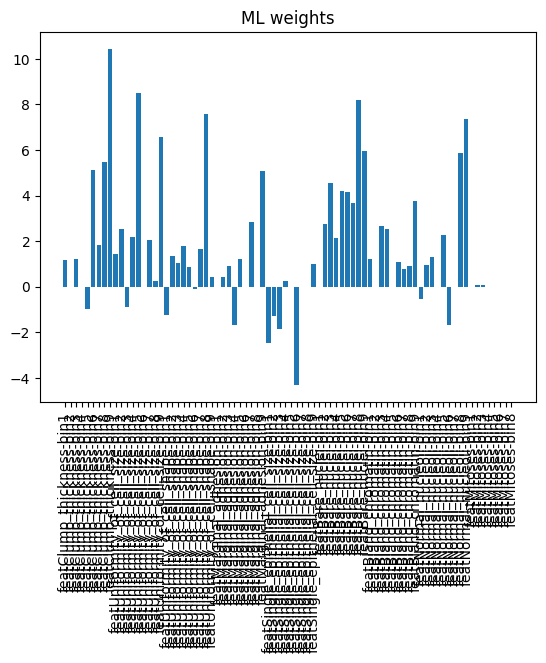

num of zero weights:  20
num of non-zero weights:  60
                                 Feature     Weight
0               featClump_thickness-bin1   1.188241
2               featClump_thickness-bin3   1.200386
4               featClump_thickness-bin5  -0.979884
5               featClump_thickness-bin6   5.118047
6               featClump_thickness-bin7   1.844363
7               featClump_thickness-bin8   5.484701
8               featClump_thickness-bin9  10.433978
9       featUniformity_of_cell_size-bin1   1.447992
10      featUniformity_of_cell_size-bin2   2.517637
11      featUniformity_of_cell_size-bin3  -0.905386
12      featUniformity_of_cell_size-bin4   2.198365
13      featUniformity_of_cell_size-bin5   8.522454
15      featUniformity_of_cell_size-bin7   2.052286
16      featUniformity_of_cell_size-bin8   0.267659
17      featUniformity_of_cell_size-bin9   6.582607
18     featUniformity_of_cell_shape-bin1  -1.251871
19     featUniformity_of_cell_shape-bin2   1.345416
20     fea

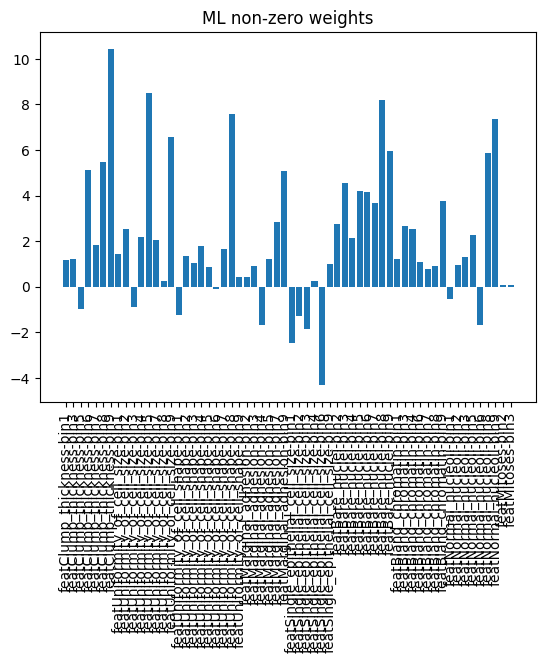

MSEs:  [0.07246376811594203, 0.028985507246376812, 0.057971014492753624, 0.058823529411764705, 0.0, 0.029411764705882353, 0.04411764705882353, 0.0, 0.029411764705882353, 0.0]
accuracies:  [0.927536231884058, 0.9710144927536232, 0.9420289855072463, 0.9411764705882353, 1.0, 0.9705882352941176, 0.9558823529411765, 1.0, 0.9705882352941176, 1.0]
AUCs:  [0.9888888888888889, 0.9981481481481481, 0.9787037037037037, 0.9922705314009662, 1.0, 0.9933712121212122, 0.9981060606060607, 1.0, 0.9990530303030303, 1.0]
mean MSE:  0.03211849957374254
mean accuracy:  0.9678815004262574
mean AUC:  0.9948541575172009
Execution time: 0.5516941547393799 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_1ook_ml_model, breast_cancer_infbins_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
num of features:  9
categorical features:  Index([], dtype='object')
aqui 1
inicio fit  []
aqui 2
aqui 3
categorical aqui:  []
X shape[1]:  9
Feature non categorical  0
# 0  GLOBAL CAIM  252.36889617486338
Feature non categorical  1
# 1  GLOBAL CAIM  295.24042053740885
Feature non categorical  2
# 2  GLOBAL CAIM  292.41902267578087
Feature non categorical  3
# 3  GLOBAL CAIM  256.9620565454012
Feature non categorical  4
# 4  GLOBAL CAIM  278.09900416440337
Feature non categorical  5
# 5  GLOBAL CAIM  284.74833997343956
Feature non categorical  6
# 6  GLOBAL CAIM  281.41383247205863
Feature non categorical  7
# 7  GLOBAL CAIM  275.0902752931823
Feature non categorical  8
# 8  GLOBAL CAIM  198.78501868975016

thresholds  {'Clump_thickness': [1.0, 5.0, 11.0], 'Uniformity_of_cell_size': [1.0, 3.0, 11.0], 'Uniformity_of_cell_shape': [1.0, 3.0, 11.0], 'Marginal_adhesion': [1.0, 3.0, 11.0], 'Single_epithelial_cell_size': [1.0, 2.0, 11.0], 'Bare_nuclei': [1.0, 2.0, 1

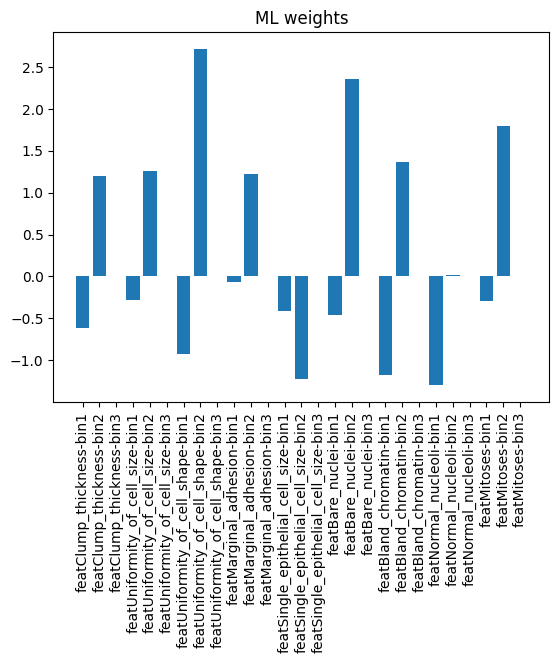

num of zero weights:  9
num of non-zero weights:  18
                                 Feature    Weight
0               featClump_thickness-bin1 -0.616743
1               featClump_thickness-bin2  1.194740
3       featUniformity_of_cell_size-bin1 -0.280879
4       featUniformity_of_cell_size-bin2  1.257509
6      featUniformity_of_cell_shape-bin1 -0.921126
7      featUniformity_of_cell_shape-bin2  2.715140
9             featMarginal_adhesion-bin1 -0.068812
10            featMarginal_adhesion-bin2  1.226552
12  featSingle_epithelial_cell_size-bin1 -0.411520
13  featSingle_epithelial_cell_size-bin2 -1.223151
15                  featBare_nuclei-bin1 -0.455196
16                  featBare_nuclei-bin2  2.354431
18              featBland_chromatin-bin1 -1.178282
19              featBland_chromatin-bin2  1.368590
21              featNormal_nucleoli-bin1 -1.295040
22              featNormal_nucleoli-bin2  0.013899
24                      featMitoses-bin1 -0.291168
25                      featM

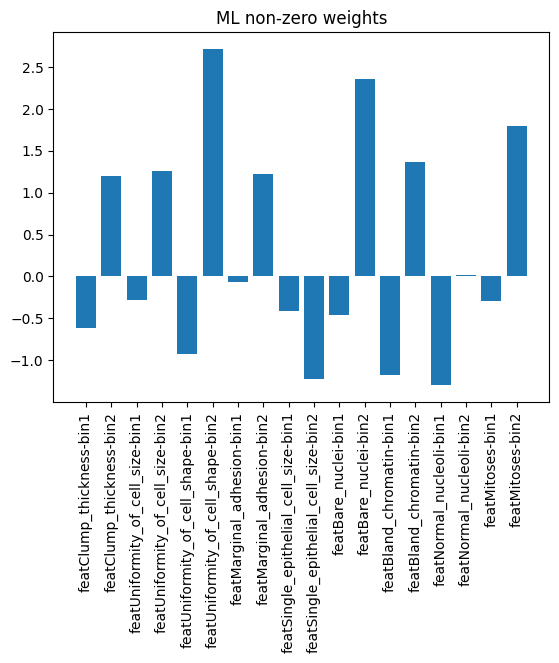

MSEs:  [0.07246376811594203, 0.028985507246376812, 0.057971014492753624, 0.058823529411764705, 0.0, 0.029411764705882353, 0.04411764705882353, 0.0, 0.029411764705882353, 0.0]
accuracies:  [0.927536231884058, 0.9710144927536232, 0.9420289855072463, 0.9411764705882353, 1.0, 0.9705882352941176, 0.9558823529411765, 1.0, 0.9705882352941176, 1.0]
AUCs:  [0.9879629629629629, 0.9990740740740741, 0.9796296296296296, 0.9922705314009661, 1.0, 0.9933712121212122, 0.9981060606060607, 1.0, 0.9990530303030303, 1.0]
mean MSE:  0.03211849957374254
mean accuracy:  0.9678815004262574
mean AUC:  0.9949467501097935
Execution time: 0.403148889541626 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_diff_ml_model, breast_cancer_caim_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [47]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 18



discretization thresholds

thresholds  {'Clump_thickness': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Uniformity_of_cell_size': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Uniformity_of_cell_shape': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Marginal_adhesion': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Single_epithelial_cell_size': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Bare_nuclei': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Bland_chromatin': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Normal_nucleoli': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], 'Mitoses': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 9.0]}
num of bins: 
  Clump_thickness: 10
  Uniformity_of_cell_size: 10
  Uniformity_of_cell_shape: 10
  Marginal_adhesion: 10
  Single_epithelial_cell_size: 10
  Bare_nuclei: 10
  Bland_chromatin: 10
  Normal_nucleoli: 10
  Mitoses: 9

encoding

model
ML best parameters:  {'C': 100.0}
ML best alpha:  0.01
ML weights:
                      Feature    Weig

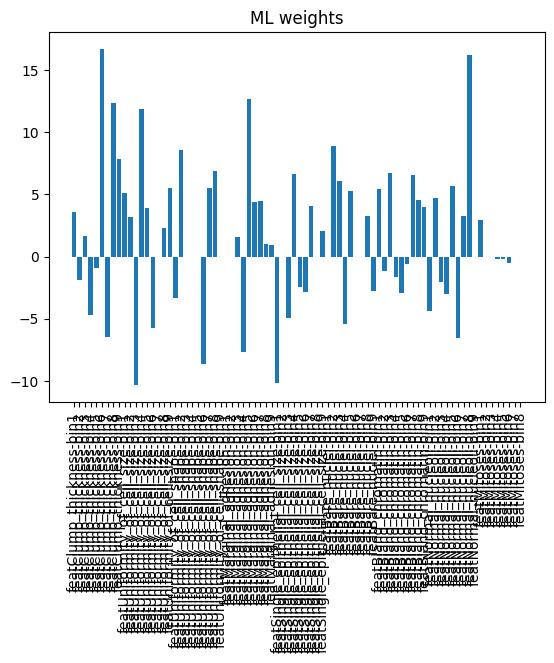

num of zero weights:  15
num of non-zero weights:  65
                     Feature     Weight
0   featClump_thickness-bin1   3.549098
1   featClump_thickness-bin2  -1.923419
2   featClump_thickness-bin3   1.624199
3   featClump_thickness-bin4  -4.728612
4   featClump_thickness-bin5  -0.888099
..                       ...        ...
70  featNormal_nucleoli-bin8  16.244146
72          featMitoses-bin1   2.933521
75          featMitoses-bin4  -0.208521
76          featMitoses-bin5  -0.172895
77          featMitoses-bin6  -0.511326

[65 rows x 2 columns]


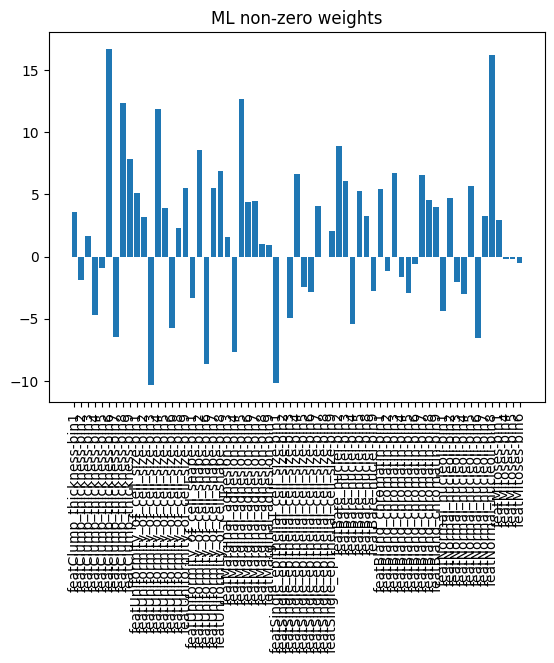

MSEs:  [0.07246376811594203, 0.028985507246376812, 0.057971014492753624, 0.058823529411764705, 0.0, 0.029411764705882353, 0.04411764705882353, 0.0, 0.029411764705882353, 0.0]
accuracies:  [0.927536231884058, 0.9710144927536232, 0.9420289855072463, 0.9411764705882353, 1.0, 0.9705882352941176, 0.9558823529411765, 1.0, 0.9705882352941176, 1.0]
AUCs:  [0.9888888888888889, 0.9981481481481481, 0.9777777777777777, 0.9922705314009662, 1.0, 0.9933712121212122, 0.9981060606060607, 1.0, 0.9990530303030303, 1.0]
mean MSE:  0.03211849957374254
mean accuracy:  0.9678815004262574
mean AUC:  0.9947615649246083
Execution time: 0.7155470848083496 seconds


In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_diff_ml_model, breast_cancer_infbins_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## tic tac toe
classify configurations of tic-tac-toe game as a win for "x" or not


https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame

num observations:  class    958
dtype: int64
num features:  9
target distribution:  class
1        626
0        332
Name: count, dtype: int64


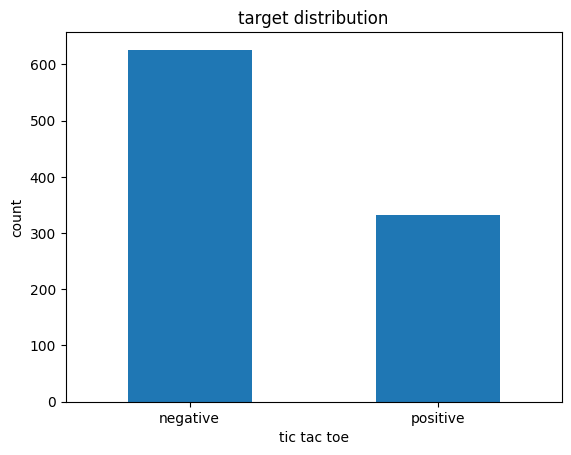

In [ ]:
# fetch dataset 
tic_tac_toe_data = fetch_ucirepo(id=101) 
  
# data (as pandas dataframes) 
tic_tac_toe_X = tic_tac_toe_data.data.features 
tic_tac_toe_y = tic_tac_toe_data.data.targets 

tic_tac_toe_y.loc[:,'class'] = tic_tac_toe_y['class'].map({'positive': 1, 'negative': 0})
tic_tac_toe_y = tic_tac_toe_y.astype(int)

# metadata 
# print(tic_tac_toe_data.metadata) 
  
# variable information 
# print(tic_tac_toe_data.variables) 

print("num observations: ", tic_tac_toe_y.count())
print("num features: ", tic_tac_toe_X.shape[1])
print("target distribution: ", tic_tac_toe_y.value_counts())
tic_tac_toe_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('tic tac toe')
plt.ylabel('count')
plt.xticks([0, 1], ['negative', 'positive'], rotation=0)
plt.show()


In [ ]:
categorical_columns = tic_tac_toe_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    tic_tac_toe_X[col] = tic_tac_toe_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {tic_tac_toe_X[col].unique()}")


discretization thresholds
num of features:  9
categorical features:  Index(['top-left-square', 'top-middle-square', 'top-right-square',
       'middle-left-square', 'middle-middle-square', 'middle-right-square',
       'bottom-left-square', 'bottom-middle-square', 'bottom-right-square'],
      dtype='object')
aqui 1
inicio fit  ['top-left-square', 'top-middle-square', 'top-right-square', 'middle-left-square', 'middle-middle-square', 'middle-right-square', 'bottom-left-square', 'bottom-middle-square', 'bottom-right-square']
aqui 2
aqui 3
categorical aqui:  [0, 1, 2, 3, 4, 5, 6, 7, 8]
X shape[1]:  9
Feature categorical  0
Feature categorical  1
Feature categorical  2
Feature categorical  3
Feature categorical  4
Feature categorical  5
Feature categorical  6
Feature categorical  7
Feature categorical  8

thresholds  {'top-left-square': array(['b', 'o', 'x'], dtype=object), 'top-middle-square': array(['b', 'o', 'x'], dtype=object), 'top-right-square': array(['b', 'o', 'x'], dtype=object),

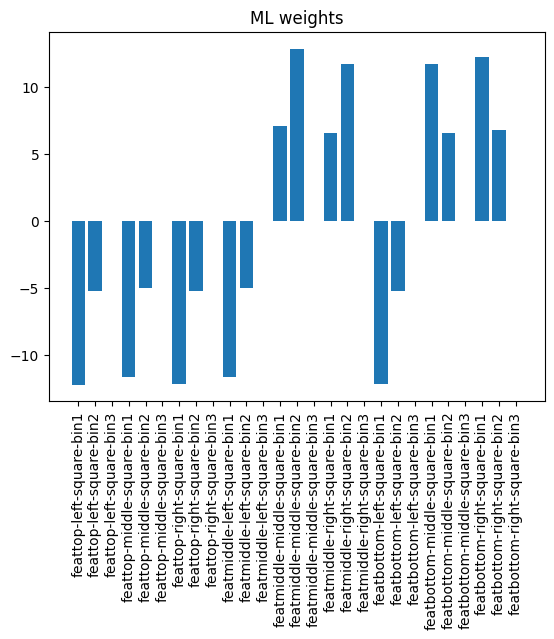

num of zero weights:  9
num of non-zero weights:  18
                          Feature     Weight
0        feattop-left-square-bin1 -12.202017
1        feattop-left-square-bin2  -5.261039
3      feattop-middle-square-bin1 -11.659398
4      feattop-middle-square-bin2  -5.025188
6       feattop-right-square-bin1 -12.187049
7       feattop-right-square-bin2  -5.244511
9     featmiddle-left-square-bin1 -11.659399
10    featmiddle-left-square-bin2  -5.025198
12  featmiddle-middle-square-bin1   7.080049
13  featmiddle-middle-square-bin2  12.834846
15   featmiddle-right-square-bin1   6.511383
16   featmiddle-right-square-bin2  11.711093
18    featbottom-left-square-bin1 -12.187089
19    featbottom-left-square-bin2  -5.244473
21  featbottom-middle-square-bin1  11.711064
22  featbottom-middle-square-bin2   6.511313
24   featbottom-right-square-bin1  12.240575
25   featbottom-right-square-bin2   6.793147


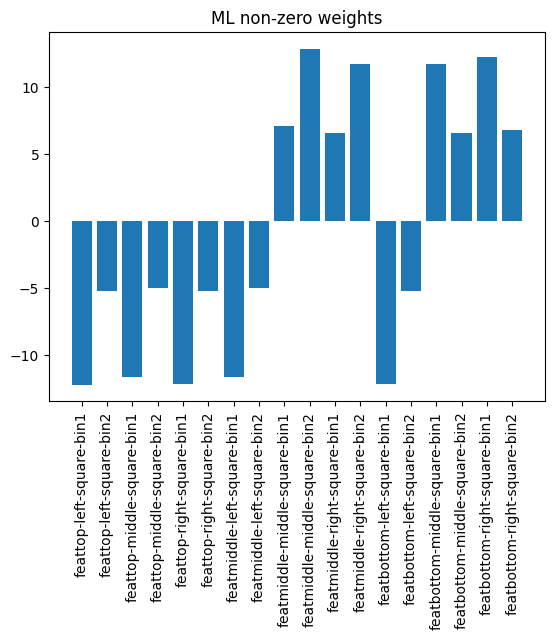

entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui
entrou aqui


ValueError: could not convert string to float: 'x'

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_1ook_ml_model, tic_tac_toe_caim_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_1ook_ml_model, tic_tac_toe_infbins_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_diff_ml_model, tic_tac_toe_caim_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_diff_ml_model, tic_tac_toe_infbins_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## sleep apnea
collection of clinical polysomnography (PSG) recordings. Beginning with PSG recordings from from ~19K patients evaluated at the Massachusetts General Hospital.

https://bdsp.io/content/hsp/2.0/#files

In [ ]:
sleep_apnea_data = pd.read_csv('../datasets/bdsp_psg_master_20231101.csv')

sleep_apnea_X = sleep_apnea_data.iloc[:, :-1]
sleep_apnea_y = sleep_apnea_data.iloc[:, -1]

print("num observations: ", sleep_apnea_y.count())
print("num features: ", sleep_apnea_X.shape[1])